### 참고사항
 - 다중공성선 제거 방법 : regularization


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 80% !important; }</style>"))
pd.set_option("display.max_columns", 45)

In [2]:
df = pd.read_csv('Data/datas0402.csv')

In [3]:
year = pd.read_csv('./year_start_cont.csv')

In [4]:
prize = pd.read_csv('./Data/Prize.csv')

In [5]:
prize['시즌'] = prize['시즌'].apply(lambda x: 0 if len(x) < 4 else x)

In [6]:
prize['시즌'] = prize['시즌'].astype(int)

In [7]:
prize = pd.DataFrame(prize)

In [8]:
year = year[year['데뷔'] != 0]

In [9]:
df = pd.merge(df, year, on='이름', how='inner')

In [10]:
df1 = pd.merge(df, prize, on=['이름', '시즌'], how='outer')

In [11]:
df1 = df1.dropna(thresh=6, axis=0)

In [12]:
del df1['Unnamed: 0']

In [13]:
df1.이름.unique()

array(['테임즈', '이대호', '강정호', '박석민', '최형우', '서건창', '김재환', '최정', '김하성',
       '정근우', '양의지', '손아섭', '나성범', '조인성', '유한준', '박용택', '김동주', '전준우',
       '로하스', '황재균', '이용규', '이범호', '강민호', '이택근', '러프', '로사리오', '홍성흔',
       '최희섭', '안치홍', '김선빈', '로맥', '박민우', '민병헌', '이호준', '강봉규', '오지환',
       '채태인', '조성환', '나지완', '이재원', '오재일', '김주찬', '김강민', '박정권', '이종욱',
       '최준석', '김원섭', '김재호', '박경완', '김민성', '허경민', '오재원', '박해민', '최진행',
       '신명철', '박한이', '송지만', '박재상', '손시헌', '진갑용', '이대수', '조동찬', '양준혁',
       '나주환', '장성호', '정의윤', '필', '정상호', '이대형', '박진만', '차일목', '한상훈', '임재철',
       '신경현', '이숭용', '최동수', '고영민', '이현곤', '이종범', '조동화', '강귀태', '이영우',
       '박기혁'], dtype=object)

In [14]:
df = df.drop_duplicates()
df

ID   이름    시즌   팀 포지션  나이      G     타석     타수     득점     안타     타1  \
0       0  테임즈  2014  NC  1B  29  125.0  514.0  443.0   95.0  152.0   79.0   
3       0  테임즈  2015  NC  1B  30  142.0  595.0  472.0  130.0  180.0   86.0   
6       0  테임즈  2016  NC  1B  31  123.0  529.0  436.0  118.0  140.0   67.0   
9       1  이대호  2010  롯데  3B  29  127.0  552.0  478.0   99.0  174.0  117.0   
14      1  이대호  2011  롯데  1B  30  133.0  570.0  493.0   76.0  176.0  122.0   
...   ...  ...   ...  ..  ..  ..    ...    ...    ...    ...    ...    ...   
3004  234  조동화  2015  SK  CF  35  119.0  304.0  245.0   38.0   64.0   55.0   
3011  234  조동화  2016  SK  RF  36   76.0  172.0  143.0   24.0   34.0   29.0   
3018  258  강귀태  2011  넥센   C  33   33.0   89.0   81.0    4.0   19.0   13.0   
3021  306  이영우  2010  한화  DH  38   12.0   21.0   21.0    0.0    2.0    2.0   
3022  379  박기혁  2010  롯데  SS  30   48.0  166.0  153.0   10.0   33.0   30.0   

        타2   타3    홈런     루타     타점    도루   도실     볼넷    사구    고4     삼진  \
0     30.0  6.0  37.0  305.0  121.0  11.0  2.0   58.0   7.0   5.0   99.0   
3     42.0  5.0  47.0  373.0  140.0  40.0  8.0  103.0  13.0  11.0   91.0   
6     30.0  3.0  40.0  296.0  121.0  13.0  4.0   74.0  12.0   6.0  103.0   
9     13.0  0.0  44.0  319.0  133.0   0.0  2.0   61.0  10.0   6.0   77.0   
14    26.0  1.0  27.0  285.0  113.0   2.0  0.0   63.0   8.0   8.0   60.0   
...    ...  ...   ...    ...    ...   ...  ...    ...   ...   ...    ...   
3004   6.0  1.0   2.0   78.0   15.0  18.0  3.0   30.0   5.0   0.0   50.0   
3011   5.0  0.0   0.0   39.0   16.0   6.0  2.0   15.0   4.0   0.0   17.0   
3018   4.0  1.0   1.0   28.0   10.0   1.0  0.0    5.0   0.0   1.0   11.0   
3021   0.0  0.0   0.0    2.0    0.0   0.0  1.0    0.0   0.0   0.0    2.0   
3022   3.0  0.0   0.0   36.0   13.0   2.0  0.0    6.0   1.0   0.0   18.0   

        병살    희타   희비     타율     출루     장타    OPS   wOBA    wRC  twoBLUCK  \
0      6.0   0.0  6.0  0.343  0.422  0.688  1.111  0.464  168.3  0.097720   
3      7.0   0.0  7.0  0.381  0.498  0.790  1.288  0.530  222.3  0.125749   
6      2.0   0.0  7.0  0.321  0.427  0.679  1.106  0.463  170.5  0.102389   
9     15.0   0.0  3.0  0.364  0.444  0.667  1.111  0.482  192.4  0.036415   
14    22.0   0.0  6.0  0.357  0.433  0.578  1.011  0.455  180.0  0.064039   
...    ...   ...  ...    ...    ...    ...    ...    ...    ...       ...   
3004   2.0  22.0  2.0  0.261  0.351  0.318  0.669  0.297   68.3  0.031088   
3011   2.0   8.0  2.0  0.238  0.323  0.273  0.596  0.279   48.9  0.039683   
3018   4.0   2.0  1.0  0.235  0.276  0.346  0.622  0.277   60.3  0.057971   
3021   0.0   0.0  0.0  0.095  0.095  0.095  0.191  0.090  -66.7  0.000000   
3022   5.0   5.0  1.0  0.216  0.248  0.235  0.484  0.225   22.8  0.022222   

      threeBLUCK    ISO       BBK   ISOD        연봉  횟수  경험    데뷔         학력  \
0       0.019544  0.345  0.079767  0.079   25000.0   1   0  2014     용병-용병대   
3       0.014970  0.409 -0.020168  0.117  125000.0   2   1  2014     용병-용병대   
6       0.010239  0.358  0.054820  0.106  125000.0   3   2  2014     용병-용병대   
9       0.000000  0.303  0.028986  0.080   39000.0   1   0  2001        경남고   
14      0.002463  0.221 -0.005263  0.076   63000.0   2   1  2001        경남고   
...          ...    ...       ...    ...       ...  ..  ..   ...        ...   
3004    0.005181  0.057  0.065789  0.090   30000.0   2   4  2001        공주고   
3011    0.000000  0.035  0.011628  0.085   30000.0   3   5  2001        공주고   
3018    0.014493  0.111  0.067416  0.041   10000.0   1   0  2002  인천동산고-동국대   
3021    0.000000  0.000  0.095238  0.000   13000.0   1   0  1996   선린인고-건국대   
3022    0.000000  0.019  0.072289  0.032   12000.0   1   0  2000      대구상원고   

                                     계약  
0                                ['연도']  
3                                ['연도']  
6                                ['연도']  
9     ['연도', '2001년', '2012년', '2017년']  
14    ['연도', '2001년', '2012년', '2017년']  
...                            

In [15]:
mvp = pd.read_csv('./Data/mvp1')
mvp.head()

이름    시즌    MVP
0  박경완  2000  시즌MVP
1  이대호  2010  시즌MVP
2  이종범  1994  시즌MVP
3  김재환  2018  시즌MVP
4  서건창  2014  시즌MVP

In [16]:
df2 = pd.merge(df1, mvp, on=['이름', '시즌'], how='outer')

In [17]:
df2 = df2.dropna(thresh=6, axis=0)

In [18]:
df2.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '학력', '계약',
       '수상', 'MVP'],
      dtype='object')

In [19]:
df2 = df2.drop_duplicates()

In [20]:
df2['MVP'] = df2['MVP'].fillna(0)
df2.head()

ID   이름    시즌   팀 포지션    나이      G     타석     타수     득점     안타     타1  \
0   0.0  테임즈  2014  NC  1B  29.0  125.0  514.0  443.0   95.0  152.0   79.0   
3   0.0  테임즈  2015  NC  1B  30.0  142.0  595.0  472.0  130.0  180.0   86.0   
6   0.0  테임즈  2016  NC  1B  31.0  123.0  529.0  436.0  118.0  140.0   67.0   
9   1.0  이대호  2010  롯데  3B  29.0  127.0  552.0  478.0   99.0  174.0  117.0   
14  1.0  이대호  2011  롯데  1B  30.0  133.0  570.0  493.0   76.0  176.0  122.0   

      타2   타3    홈런     루타     타점    도루   도실     볼넷    사구    고4     삼진    병살  \
0   30.0  6.0  37.0  305.0  121.0  11.0  2.0   58.0   7.0   5.0   99.0   6.0   
3   42.0  5.0  47.0  373.0  140.0  40.0  8.0  103.0  13.0  11.0   91.0   7.0   
6   30.0  3.0  40.0  296.0  121.0  13.0  4.0   74.0  12.0   6.0  103.0   2.0   
9   13.0  0.0  44.0  319.0  133.0   0.0  2.0   61.0  10.0   6.0   77.0  15.0   
14  26.0  1.0  27.0  285.0  113.0   2.0  0.0   63.0   8.0   8.0   60.0  22.0   

     희타   희비     타율     출루     장타    OPS   wOBA    wRC  twoBLUCK  threeBLUCK  \
0   0.0  6.0  0.343  0.422  0.688  1.111  0.464  168.3  0.097720    0.019544   
3   0.0  7.0  0.381  0.498  0.790  1.288  0.530  222.3  0.125749    0.014970   
6   0.0  7.0  0.321  0.427  0.679  1.106  0.463  170.5  0.102389    0.010239   
9   0.0  3.0  0.364  0.444  0.667  1.111  0.482  192.4  0.036415    0.000000   
14  0.0  6.0  0.357  0.433  0.578  1.011  0.455  180.0  0.064039    0.002463   

      ISO       BBK   ISOD        연봉   횟수   경험      데뷔      학력  \
0   0.345  0.079767  0.079   25000.0  1.0  0.0  2014.0  용병-용병대   
3   0.409 -0.020168  0.117  125000.0  2.0  1.0  2014.0  용병-용병대   
6   0.358  0.054820  0.106  125000.0  3.0  2.0  2014.0  용병-용병대   
9   0.303  0.028986  0.080   39000.0  1.0  0.0  2001.0     경남고   
14  0.221 -0.005263  0.076   63000.0  2.0  1.0  2001.0     경남고   

                                   계약  수상    MVP  
0                              ['연도']   0      0  
3                              ['연도']  GG  시즌MVP  
6                              ['연도']  GG      0  
9   ['연도', '2001년', '2012년', '2017년']  GG  시즌MVP  
14  ['연도', '2001년', '2012년', '2017년']  GG      0

In [21]:
df2['MVP'][df2['MVP'] != 0] = 1

In [22]:
df2.MVP.unique()

array([0, 1], dtype=object)

In [23]:
df2.수상.unique()

array(['0', 'GG', 'POMVP', 'ALMVP', 'SPMVP', 'HSMVP', nan], dtype=object)

In [24]:
import missingno as msno

msno.matrix(df1)
plt.show()

Text(0.5, 1.0, '시즌별 연봉 중앙값')

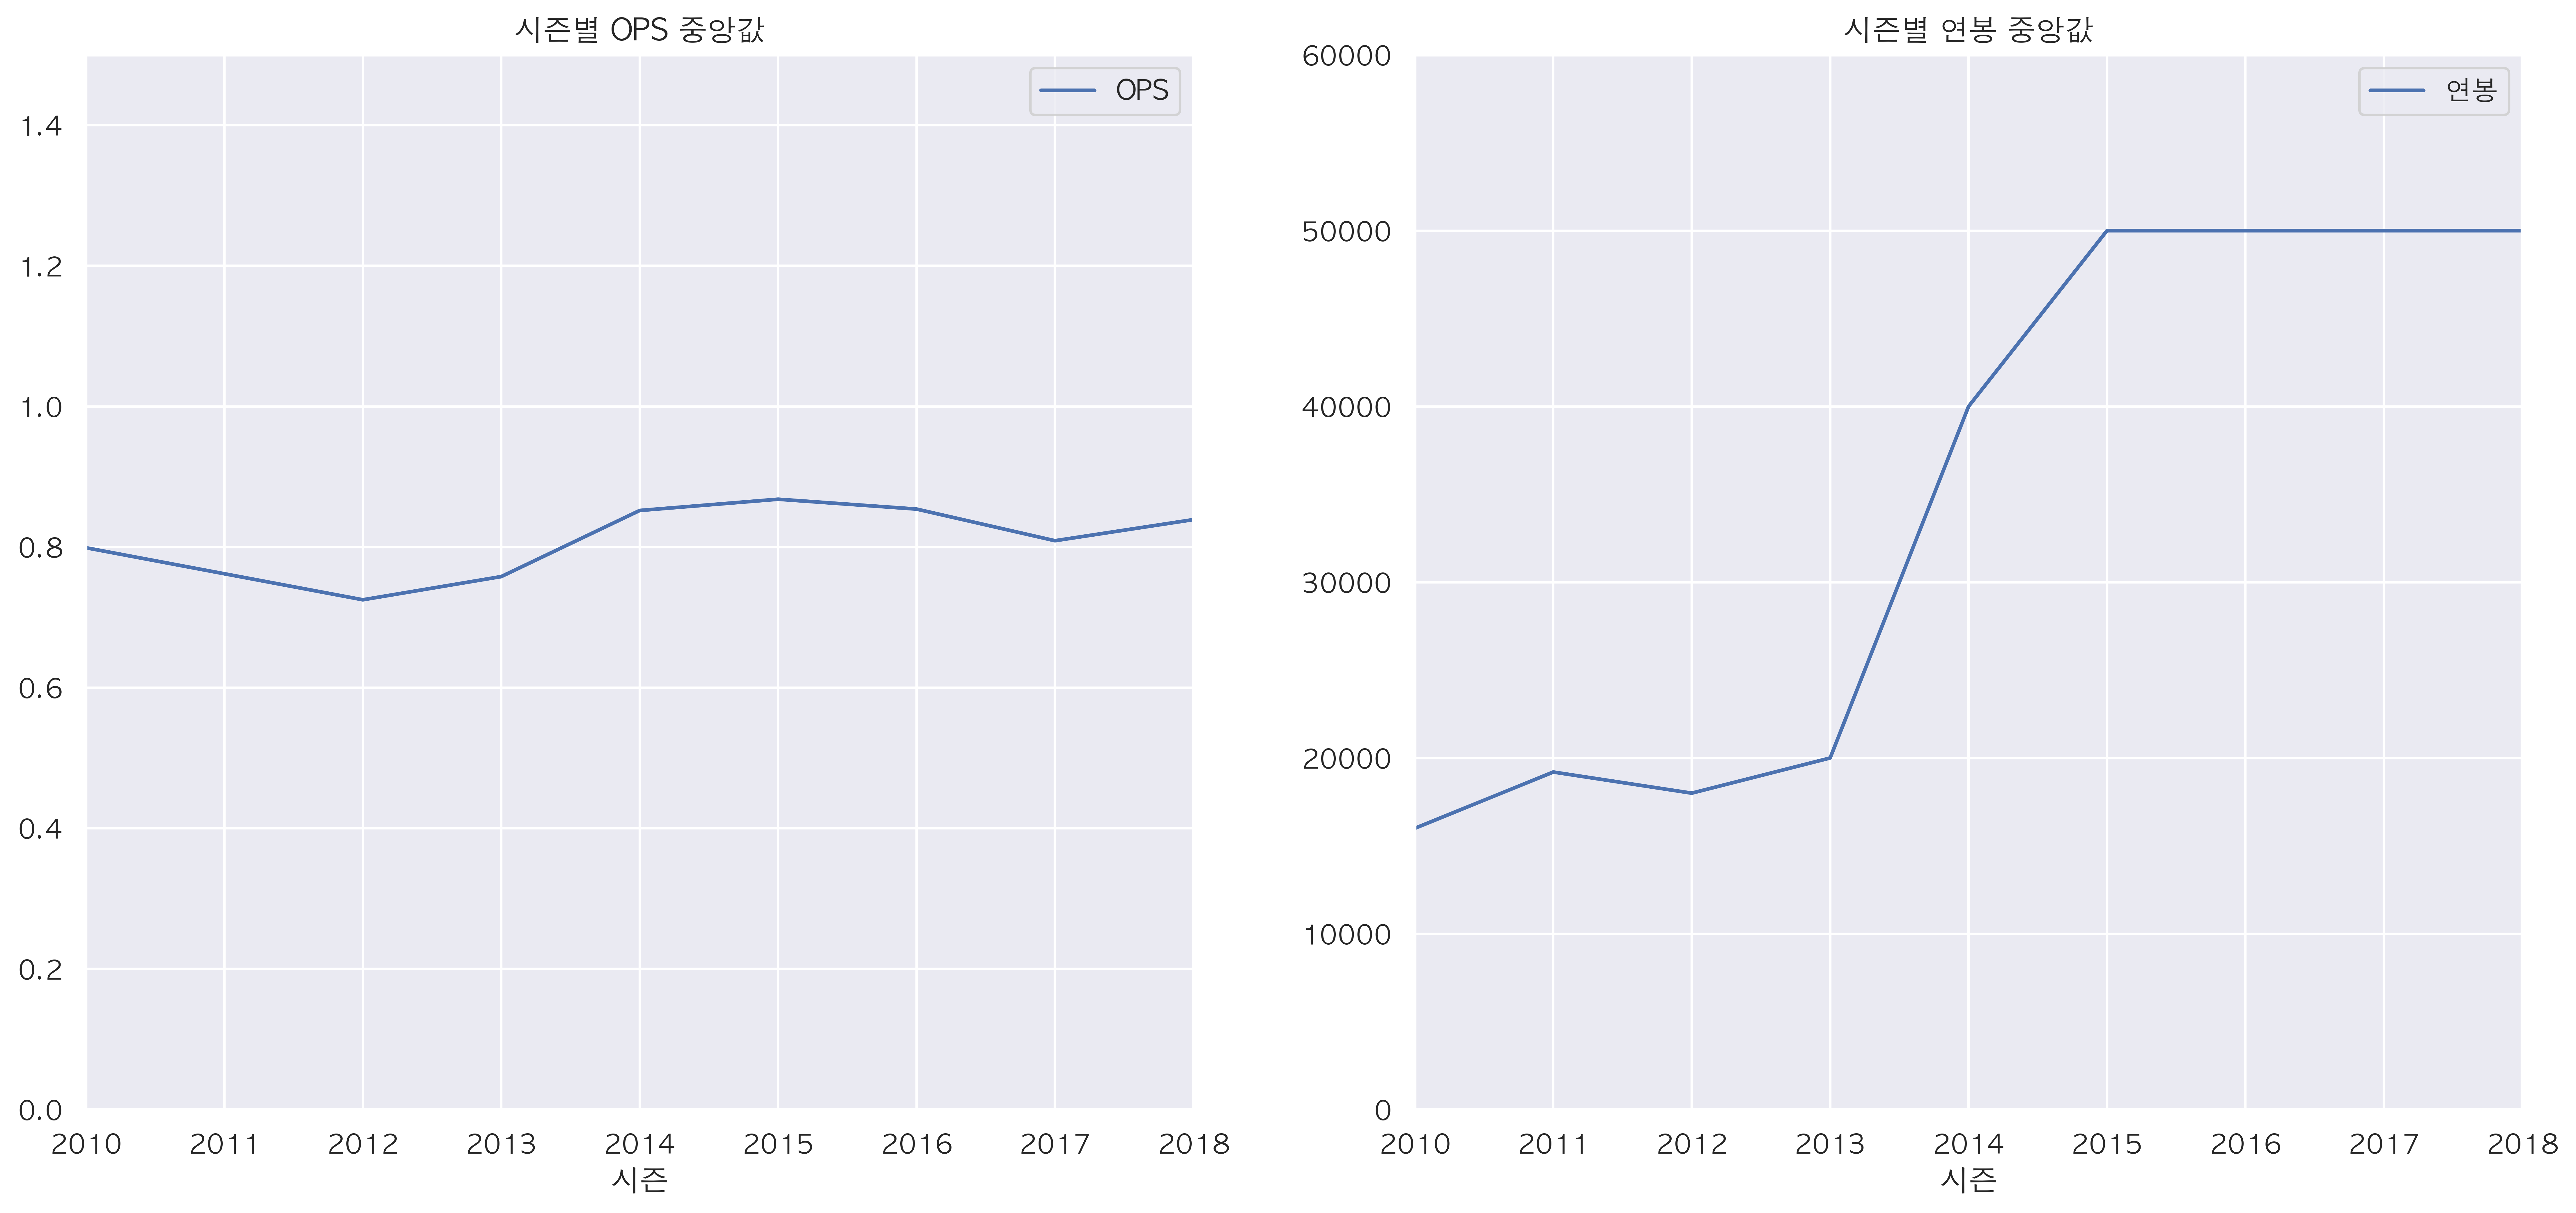

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df1[['시즌', 'OPS']].groupby('시즌').median().plot(ax=ax[0])
ax[0].set_ylim(0, 1.5)
ax[0].set_title('시즌별 OPS 중앙값')
df1[['시즌', '연봉']].groupby('시즌').median().plot(ax=ax[1])
ax[1].set_ylim(0, 60000)
ax[1].set_title('시즌별 연봉 중앙값')

In [26]:
df2['시즌C'] = df2.시즌.apply(lambda x: 0 if x <= 2013 else x)
df2['시즌C'] = df2.시즌C.apply(lambda x: 1 if x == 2014 else x)
df2['시즌C'] = df2.시즌C.apply(lambda x: 2 if x > 2014 else x)

In [27]:
df2['경험N'] = df2['시즌'] - df2['데뷔']

In [28]:
#train = df[df.시즌 <= 2017]
#test = df[df.시즌 == 2018]

In [29]:
import re
names = df.이름.unique()
df2['외국인'] = None
for name in names:
    if re.findall('[에, 브, 워, 대, 피, 히, 버, 러, 칸, 루, 필, 파, 스, 아,마, 가, 초, 모, 로, 발, 번, 테, 호]', name[0]):
        df2['외국인'][df2['이름'] == name] = 1
    else:
        df2['외국인'][df2['이름'] == name] = 0

In [30]:
df2['BABIP'] = (df2['안타'] - df2['홈런']) / \
    (df2['타수'] - df2['삼진']-df2['홈런'] - df2['희비'])

In [31]:
a = ['나바로', '조쉬벨', '고메즈']
for name in a:
    df2['외국인'][df2['이름'] == name] = 1

In [32]:
df2['이적'] = None
for x in df2['이름']:
    df2['이적'][df2['이름'] == x] = len(df2[df2['이름'] == x]['팀'].unique()) - 1

In [33]:
df2['이적C'] = df2.이적.apply(lambda x: 0 if x <= 2 else x)
df2['이적C'] = df2.이적C.apply(lambda x: 1 if x > 2 else x)
#df['이적C'] = df.이적C.apply(lambda x: 2 if x >= 3 else x)
#df['이적C'] = df.이적C.apply(lambda x: 3 if x >= 3 else x)

In [34]:
df2['나이C'] = df2.나이.apply(lambda x: 0 if x <= 23 else x)
df2['나이C'] = df2.나이C.apply(lambda x: 1 if 26 >= x > 23 else x)
df2['나이C'] = df2.나이C.apply(lambda x: 2 if 33 >= x > 26 else x)
df2['나이C'] = df2.나이C.apply(lambda x: 3 if 37 >= x > 33 else x)
df2['나이C'] = df2.나이C.apply(lambda x: 4 if 40 >= x > 37 else x)
df2['나이C'] = df2.나이C.apply(lambda x: 5 if x >= 40 else x)

(0, 46000)

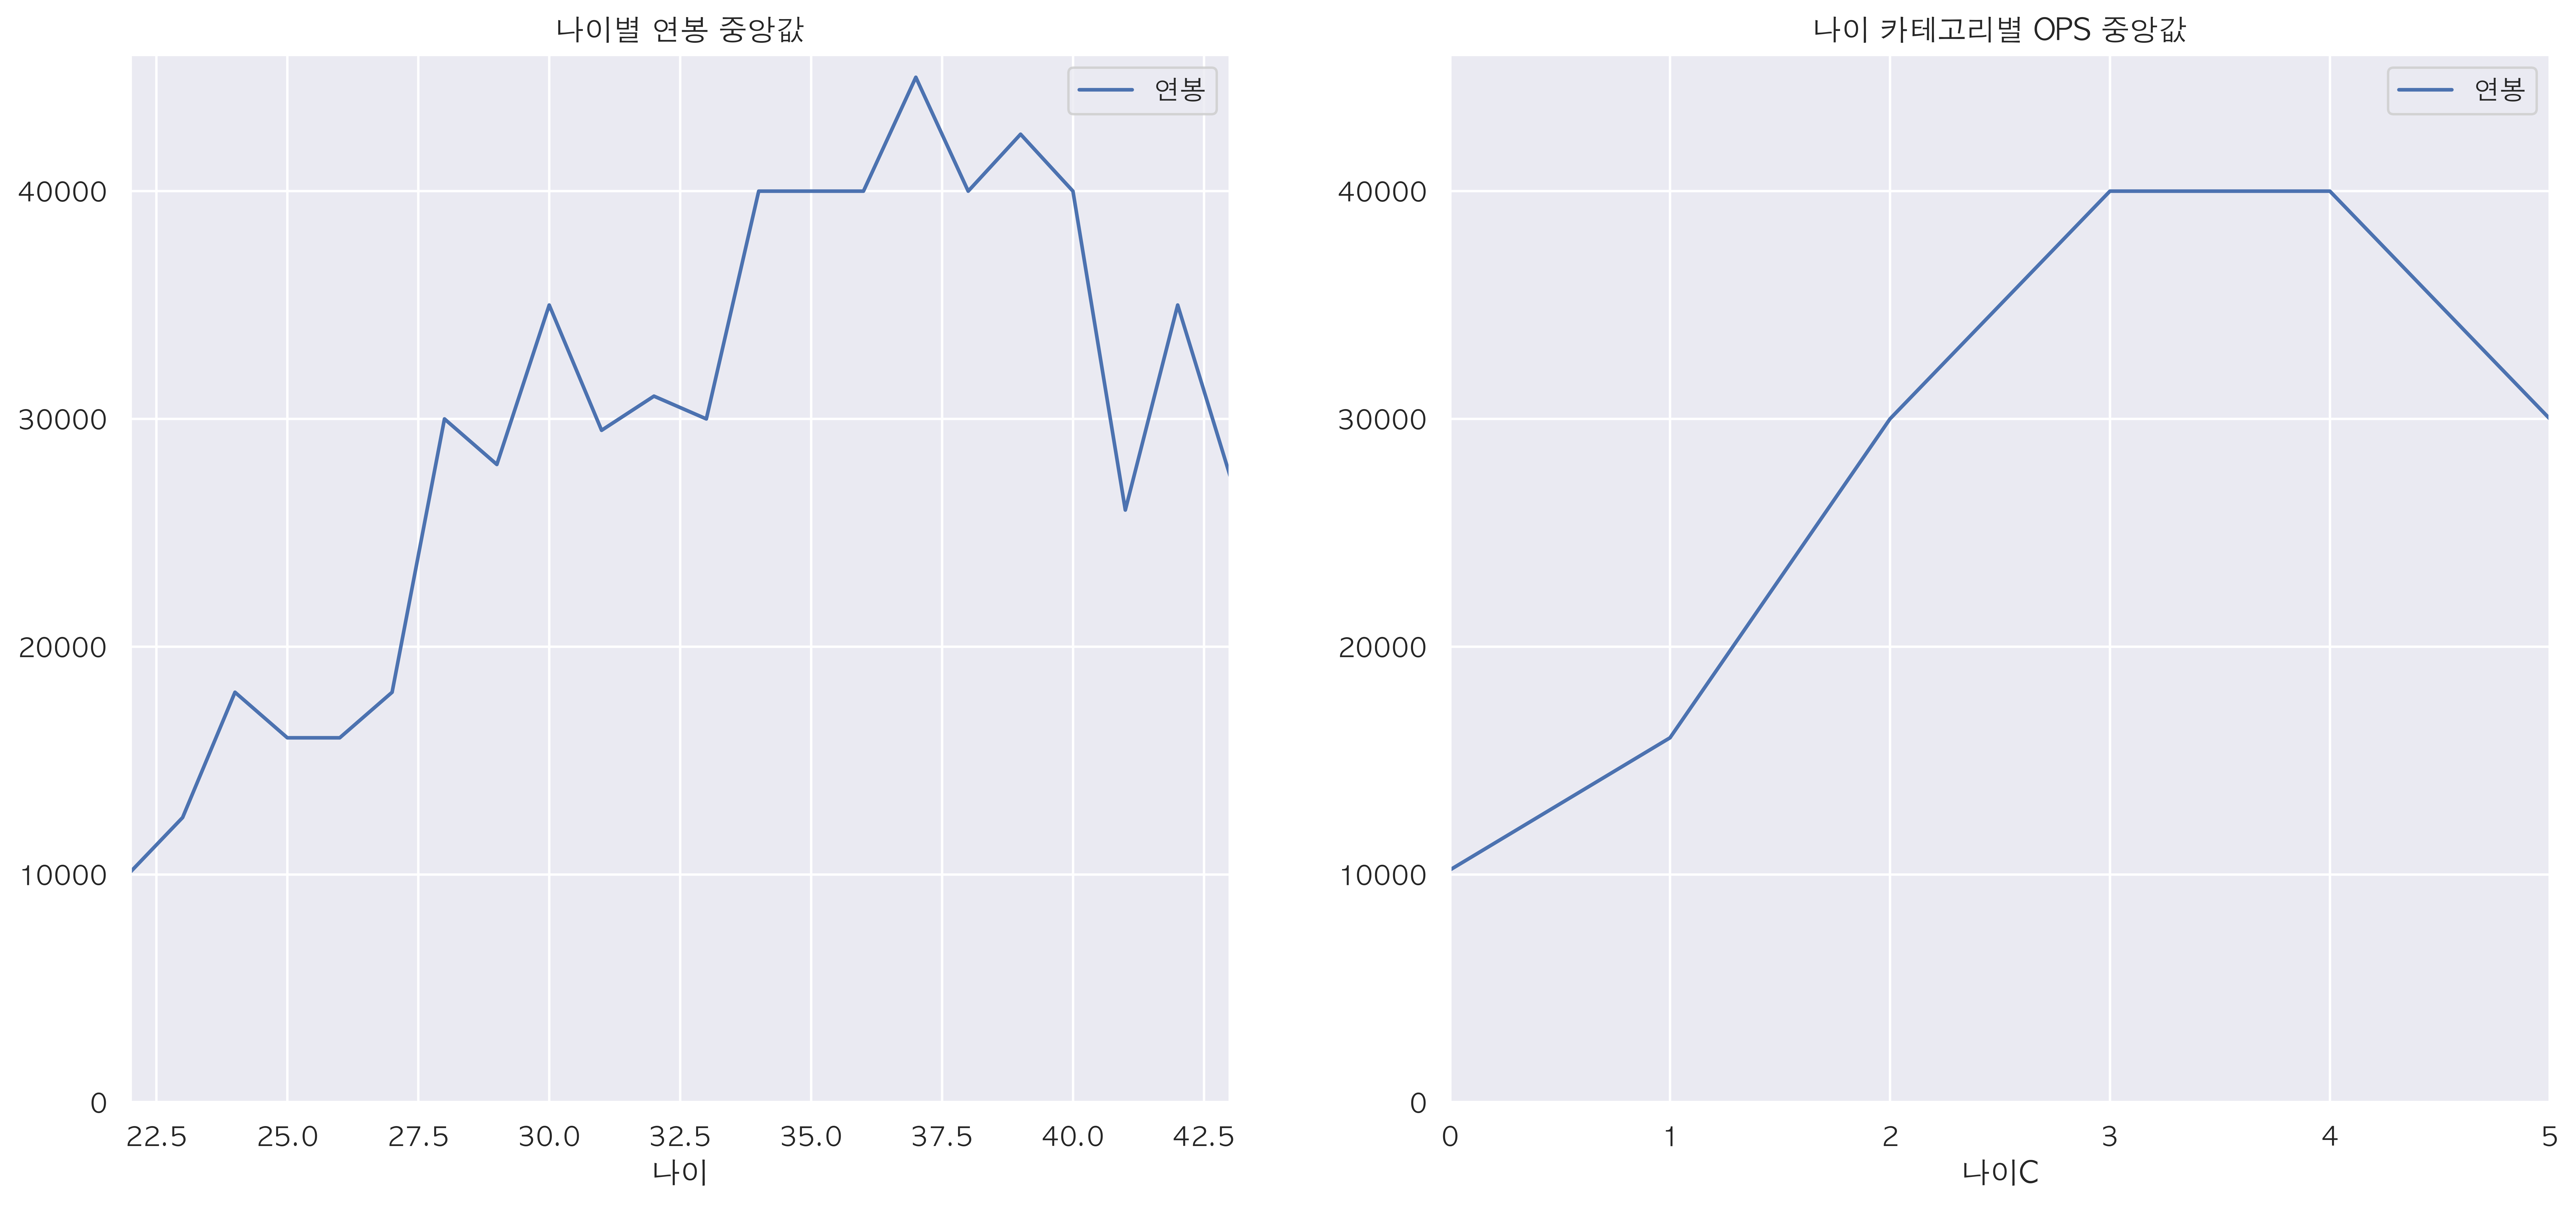

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df2[['나이', '연봉']].groupby('나이').median().plot(ax=ax[0])
ax[0].set_title('나이별 연봉 중앙값')
ax[0].set_ylim(0, 46000)

df2[['나이C', '연봉']].groupby('나이C').median().plot(ax=ax[1])
ax[1].set_title('나이 카테고리별 OPS 중앙값')
ax[1].set_ylim(0, 46000)

In [37]:
df2['이적'] = df2['이적'].astype(float)

In [ ]:
sns.jointplot(x='이적', y='연봉', data=df1)
plt.show()

In [ ]:
df1.columns

In [38]:
df2['K'] = df2['삼진']/(df2['타석'] - df2['고4'])

In [ ]:
# 변수마다 차이가 커서 scaling을 해줘야 함

df1[['G', '루타', '도루', '고4', '타3', 'BABIP', '이적',
     'ISOD', 'BBK', '경험N', '횟수']].plot.box()
plt.show()

In [ ]:
# 전성기인 27살에 가장 높은 연봉을 받을 것이다 => 30대 연봉이 더 높았고
# 학력은 별 상관 없는 듯.

### 1. 모델1

In [ ]:
model = sm.OLS.from_formula(
    '연봉 ~ C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df1)
result = model.fit()
print(result.summary())

In [ ]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=1)
for i, (idx_train, idx_test) in enumerate(cv.split(df1)):
    df_train = df1.iloc[idx_train]
    df_test = df1.iloc[idx_test]
    model = sm.OLS.from_formula(
        '연봉 ~ C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(홈런) + scale(루타) + scale(도루)\
        +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.연봉 - pred) ** 2).sum()
    tss = ((df_test.연봉 - df_test.연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

In [ ]:
plt.scatter(df_test['연봉'], pred)

### 2. 모델 2

In [39]:
df2['로그연봉'] = 1.5 * np.log(df2['연봉'])

In [ ]:
model = sm.OLS.from_formula(
    '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df1)
result = model.fit()
print(result.summary())

In [39]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=3)
for i, (idx_train, idx_test) in enumerate(cv.split(df1)):
    df_train = df1.iloc[idx_train]
    df_test = df1.iloc[idx_test]
    model = sm.OLS.from_formula(
        '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.로그연봉 - pred) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.75124984, 검증 R2 = 0.60064984
학습 R2 = 0.73338255, 검증 R2 = 0.69333434
학습 R2 = 0.72414732, 검증 R2 = 0.72779370
학습 R2 = 0.73851699, 검증 R2 = 0.65458577
학습 R2 = 0.72648458, 검증 R2 = 0.71287227


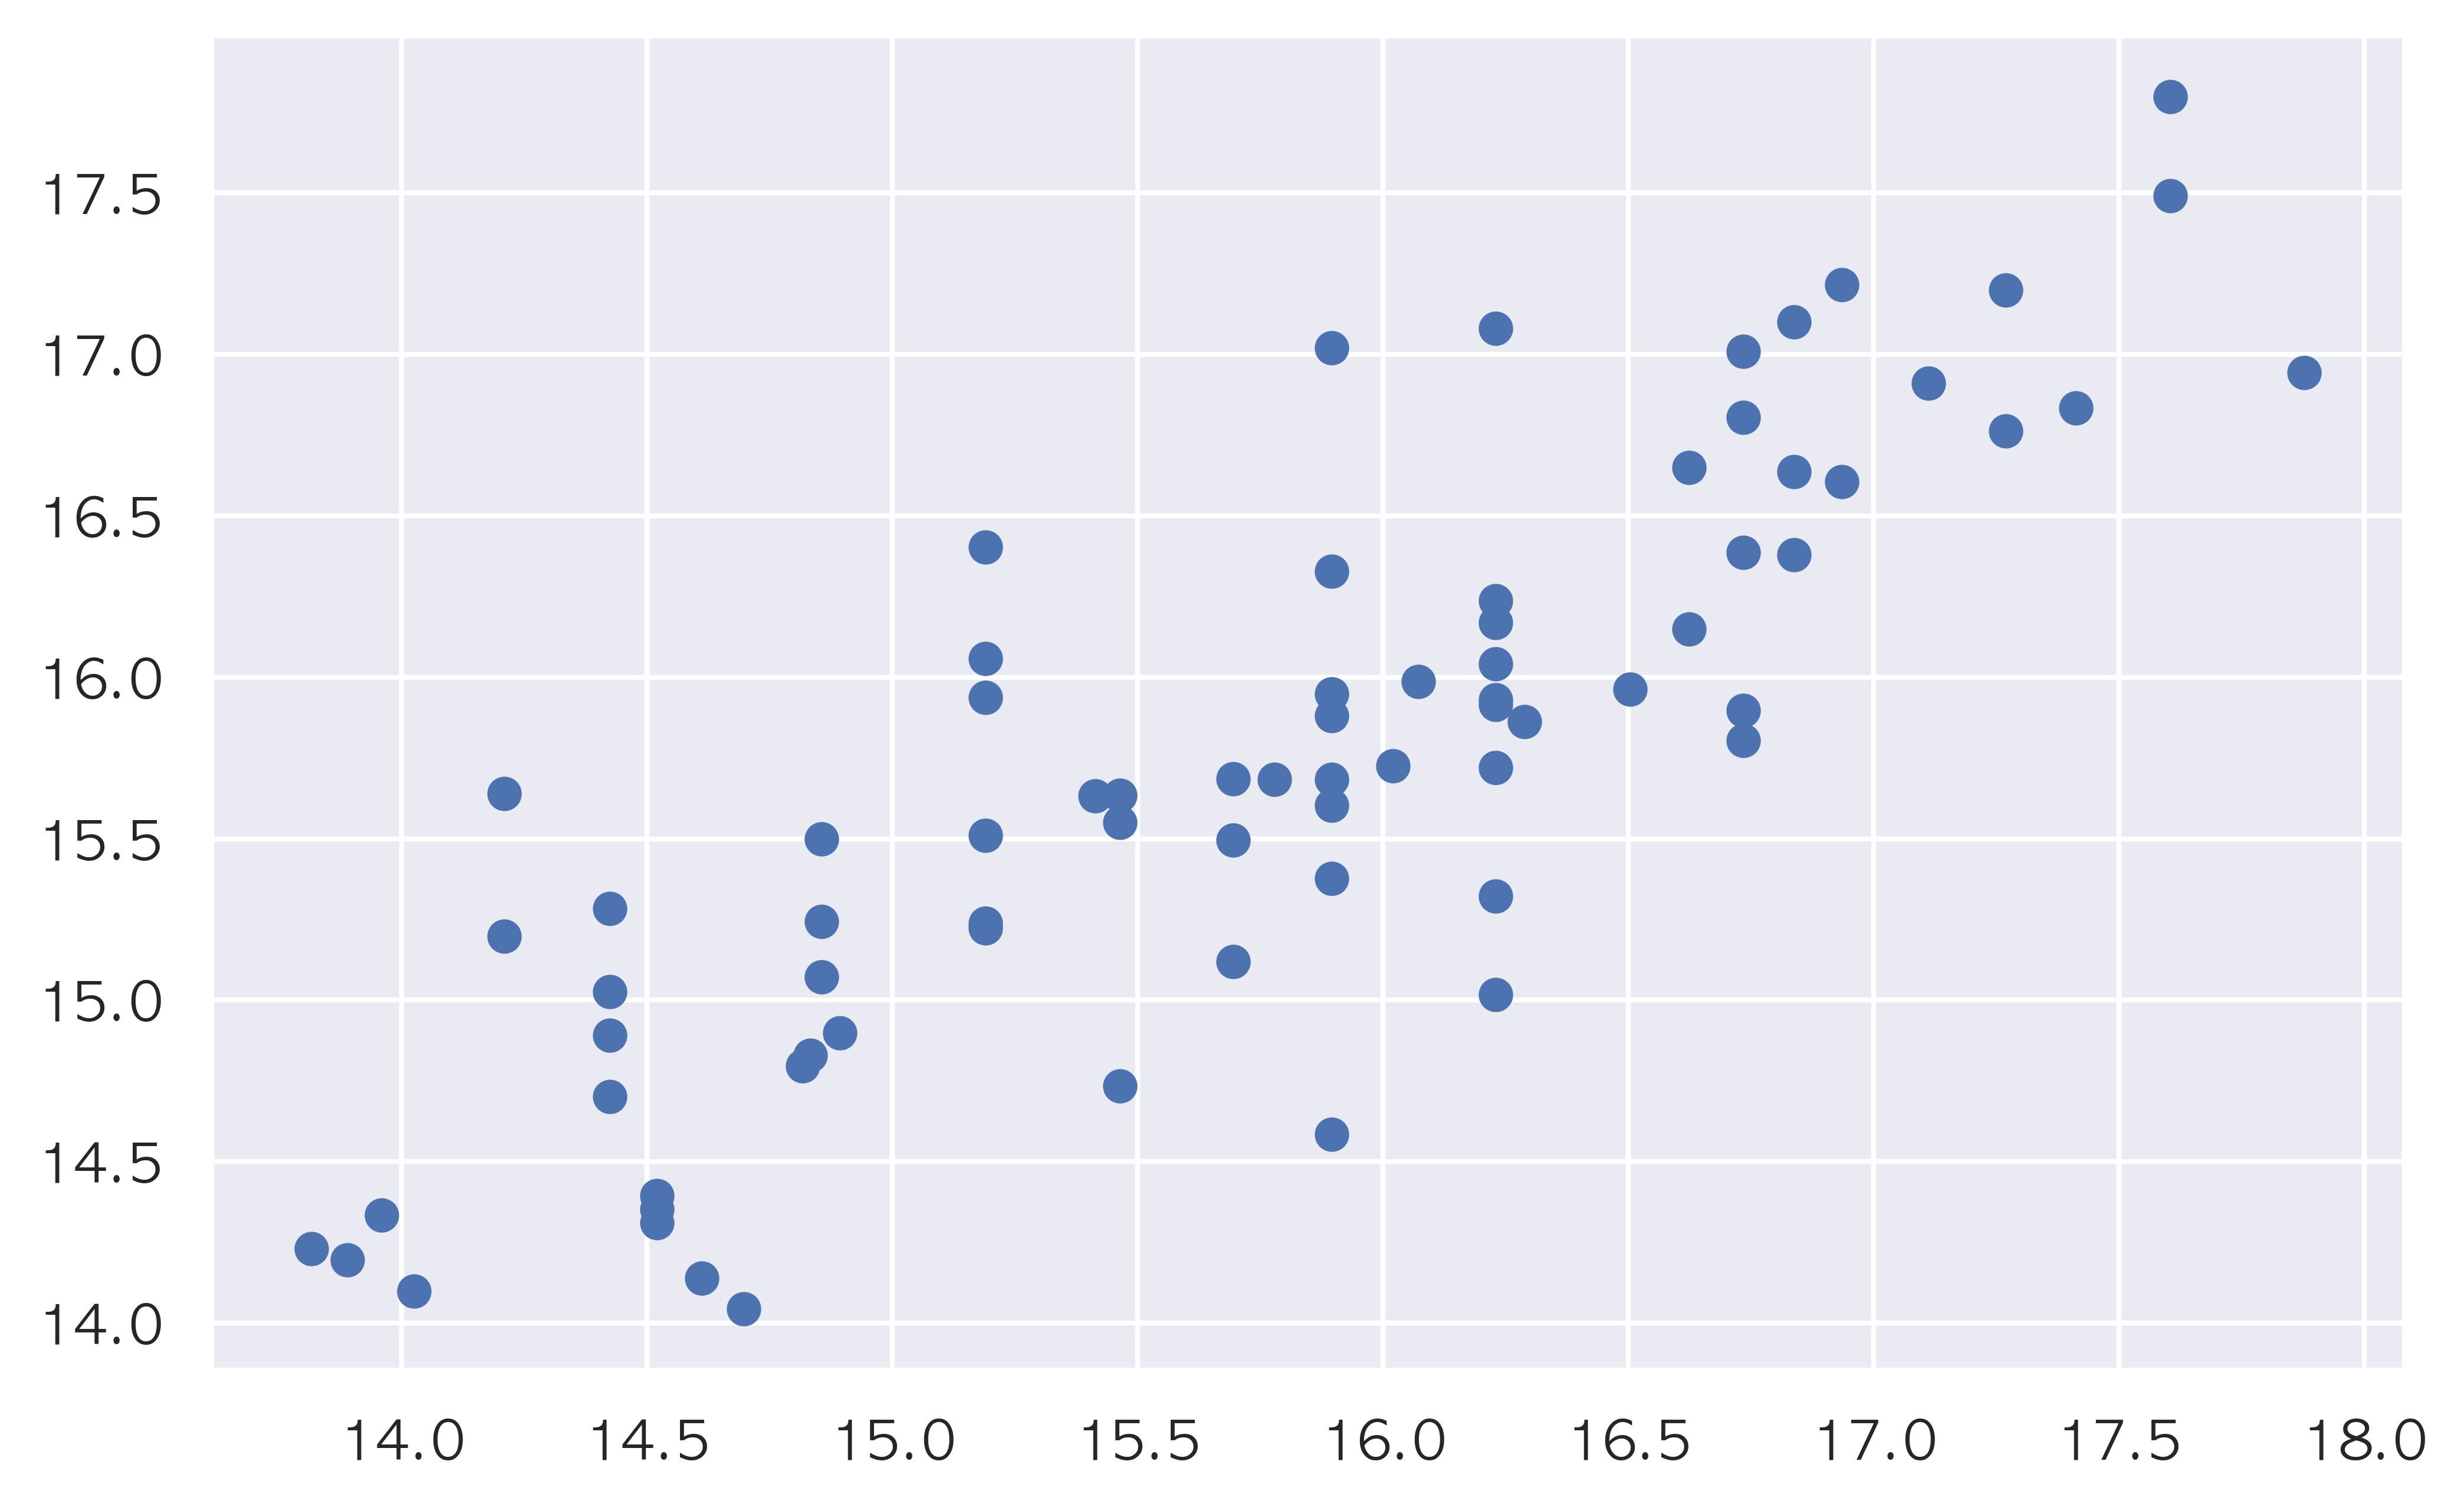

In [40]:
plt.scatter(df_test['로그연봉'], pred)

### 3. 모델3

In [40]:
df2['수상'][df2.수상.isna()] = '0'

In [41]:
df2.수상

0        0
3       GG
6       GG
9       GG
14      GG
        ..
3004     0
3011     0
3018     0
3021     0
3022     0
Name: 수상, Length: 376, dtype: object

In [52]:
df2['MVP'] = df2.MVP.astype(int)

In [43]:
df2['수상N'] = None
for x in df2['수상']:
    if x != '0':
        df2['수상N'][df2['수상'] == x] = 1
    else:
        df2['수상N'][df2['수상'] == x] = 0

In [44]:
df2['수상N'] = df2['수상N'].astype(int)

In [46]:
df2['수상N1'] = None


for name in df2['이름'].unique():
    a = 0
    N = []
    for x in df2[df2['이름'] == name]["수상N"]:
        a += x
        N.append(a)
    id_x = df2['수상N1'][df2['이름'] == name].index
    df2['수상N1'].loc[id_x] = N

In [55]:
df2['MVP1'] = None


for name in df2['이름'].unique():
    a = 0
    N = []
    for x in df2[df2['이름'] == name]["MVP"]:
        a += x
        N.append(a)
    id_x = df2['MVP1'][df2['이름'] == name].index
    df2['MVP1'].loc[id_x] = N

In [56]:
df2.head()

ID   이름    시즌   팀 포지션    나이      G     타석     타수     득점     안타     타1  \
0   0.0  테임즈  2014  NC  1B  29.0  125.0  514.0  443.0   95.0  152.0   79.0   
3   0.0  테임즈  2015  NC  1B  30.0  142.0  595.0  472.0  130.0  180.0   86.0   
6   0.0  테임즈  2016  NC  1B  31.0  123.0  529.0  436.0  118.0  140.0   67.0   
9   1.0  이대호  2010  롯데  3B  29.0  127.0  552.0  478.0   99.0  174.0  117.0   
14  1.0  이대호  2011  롯데  1B  30.0  133.0  570.0  493.0   76.0  176.0  122.0   

      타2   타3    홈런     루타     타점    도루   도실     볼넷    사구    고4  ...  \
0   30.0  6.0  37.0  305.0  121.0  11.0  2.0   58.0   7.0   5.0  ...   
3   42.0  5.0  47.0  373.0  140.0  40.0  8.0  103.0  13.0  11.0  ...   
6   30.0  3.0  40.0  296.0  121.0  13.0  4.0   74.0  12.0   6.0  ...   
9   13.0  0.0  44.0  319.0  133.0   0.0  2.0   61.0  10.0   6.0  ...   
14  26.0  1.0  27.0  285.0  113.0   2.0  0.0   63.0   8.0   8.0  ...   

         BBK   ISOD        연봉   횟수   경험      데뷔      학력  \
0   0.079767  0.079   25000.0  1.0  0.0  2014.0  용병-용병대   
3  -0.020168  0.117  125000.0  2.0  1.0  2014.0  용병-용병대   
6   0.054820  0.106  125000.0  3.0  2.0  2014.0  용병-용병대   
9   0.028986  0.080   39000.0  1.0  0.0  2001.0     경남고   
14 -0.005263  0.076   63000.0  2.0  1.0  2001.0     경남고   

                                   계약  수상  MVP  시즌C   경험N  외국인     BABIP   이적  \
0                              ['연도']   0    0    1   0.0    1  0.382060  0.0   
3                              ['연도']  GG    1    2   1.0    1  0.406728  0.0   
6                              ['연도']  GG    0    2   2.0    1  0.349650  0.0   
9   ['연도', '2001년', '2012년', '2017년']  GG    1    0   9.0    0  0.367232  0.0   
14  ['연도', '2001년', '2012년', '2017년']  GG    0    0  10.0    0  0.372500  0.0   

    이적C  나이C         K       로그연봉 수상N 수상N1 MVP1  
0     0  2.0  0.194499  15.189947   0    0    0  
3     0  2.0  0.155822  17.604104   1    1    1  
6     0  2.0  0.196941  17.604104   1    2    1  
9     0  2.0  0.141026  15.856975   1    1    1  
14    0  2.0  0.106762  16.576335   1    2    1  

[5 rows x 57 columns]

In [47]:
df2.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '학력', '계약',
       '수상', 'MVP', '시즌C', '경험N', '외국인', 'BABIP', '이적', '이적C', '나이C', 'K',
       '로그연봉', '수상N', '수상N1'],
      dtype='object')

In [59]:
model = sm.OLS.from_formula(
    '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) +scale(경험N) +scale(수상N1) +scale(MVP1)', data=df2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     35.49
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.02e-84
Time:                        18:46:42   Log-Likelihood:                -276.96
No. Observations:                 376   AIC:                             611.9
Df Residuals:                     347   BIC:                             725.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                15.07

In [68]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=2)
for i, (idx_train, idx_test) in enumerate(cv.split(df2)):
    df_train = df2.iloc[idx_train]
    df_test = df2.iloc[idx_test]
    model = sm.OLS.from_formula(
        '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) +scale(경험N) +scale(수상N1) +scale(MVP1)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.로그연봉 - pred) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.74513044, 검증 R2 = 0.66743011
학습 R2 = 0.73572560, 검증 R2 = 0.72879959
학습 R2 = 0.76081557, 검증 R2 = 0.63711130
학습 R2 = 0.75281737, 검증 R2 = 0.64889056
학습 R2 = 0.74628426, 검증 R2 = 0.68046473


(13.5, 18)

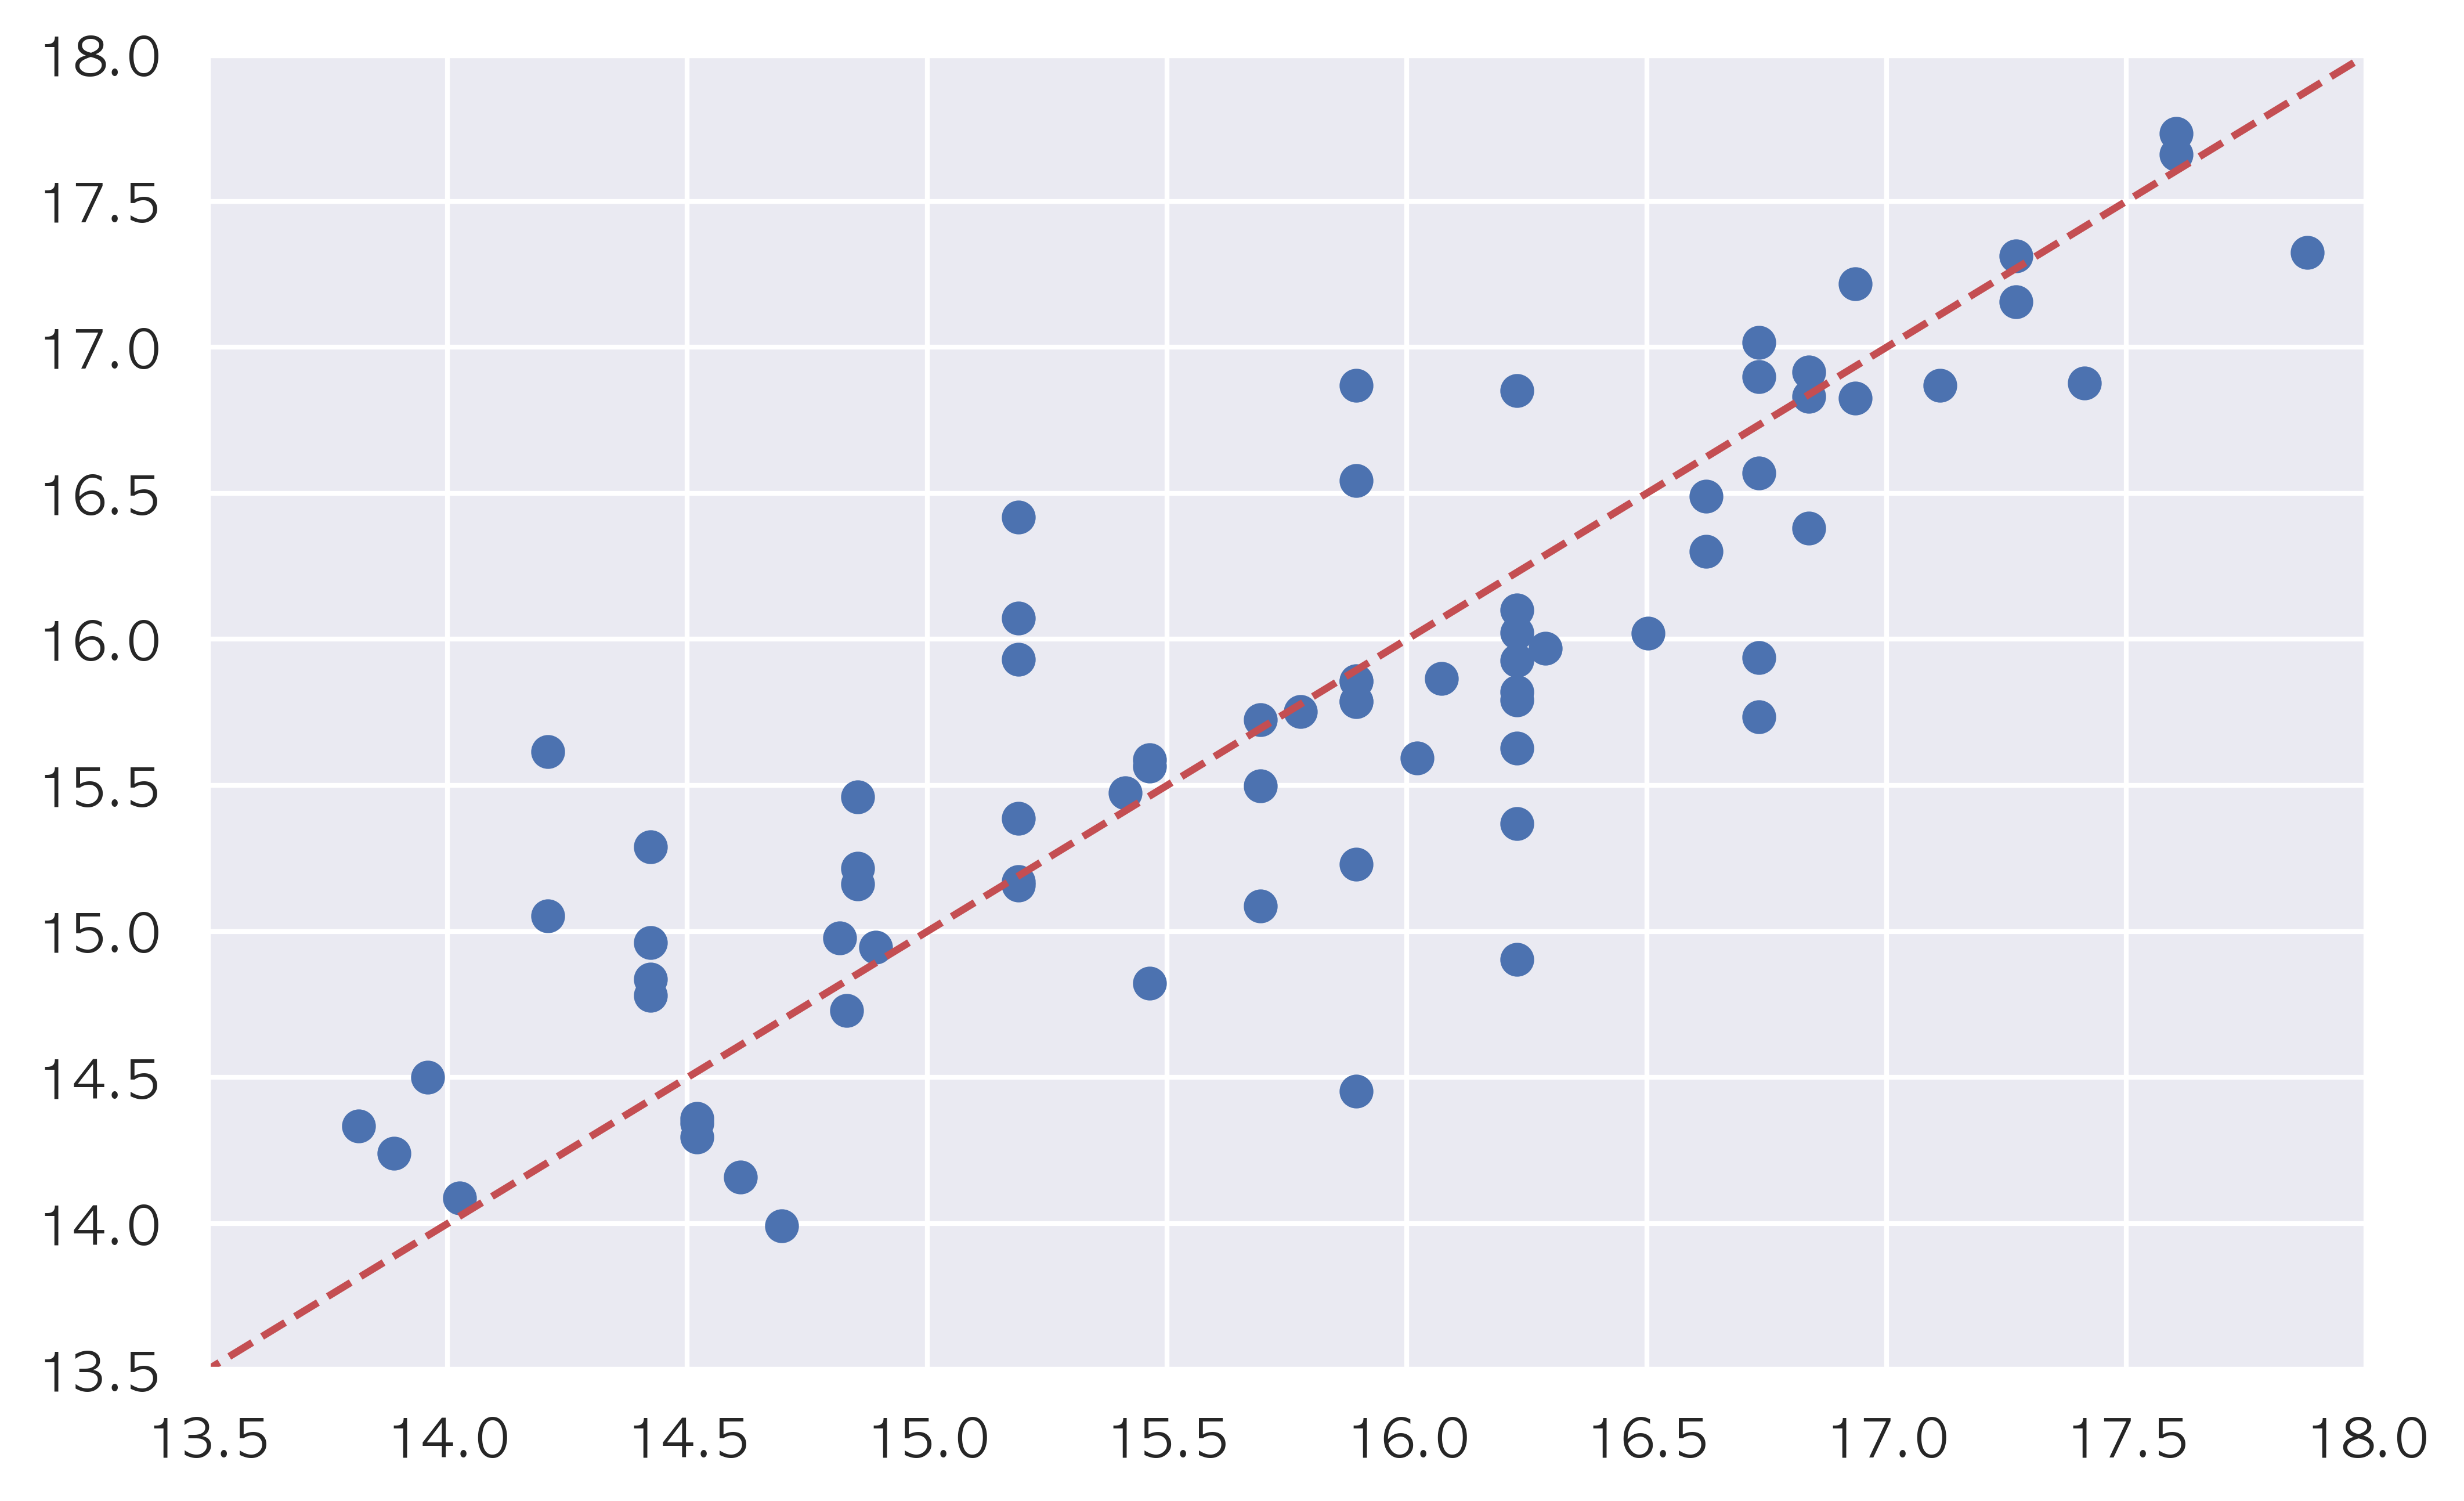

In [59]:
plt.scatter(df_test['로그연봉'], pred)
plt.plot([13,19], [13,19], ls='--', c='r')
plt.xlim(13.5, 18)
plt.ylim(13.5, 18)

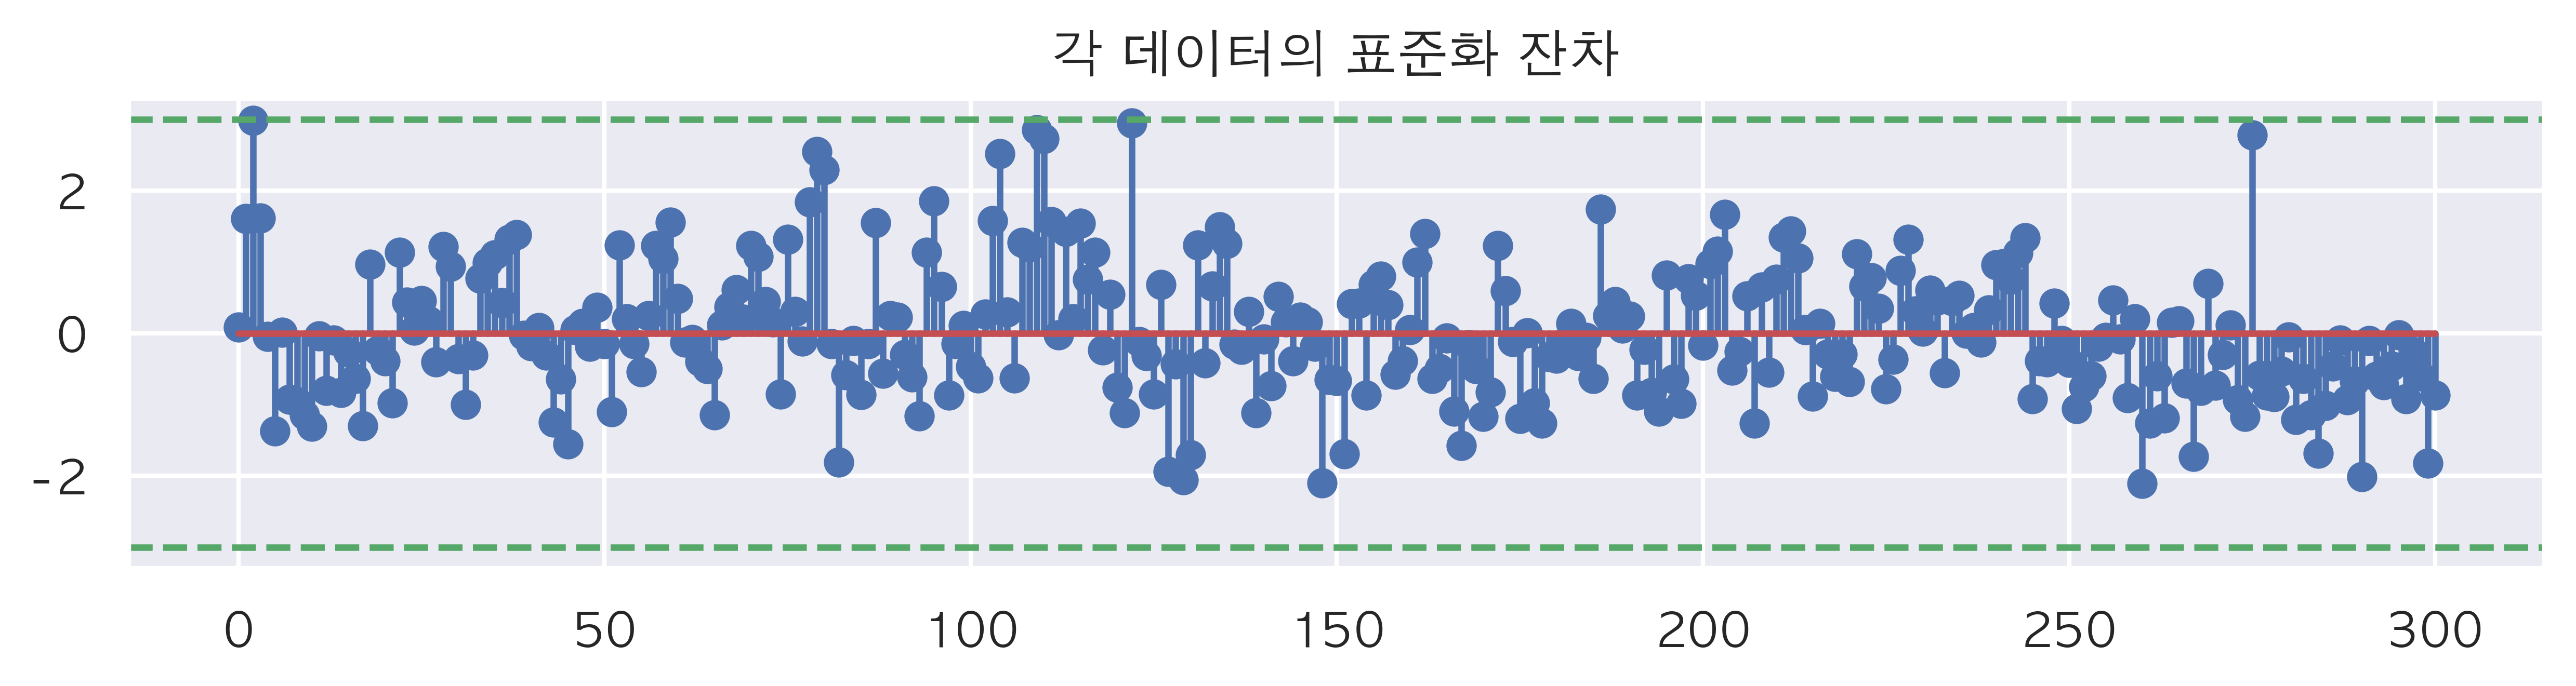

In [60]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터의 표준화 잔차")
plt.show()

In [63]:
df1.to_csv('./Data/0406_predict.csv', index=False)

In [68]:
df1[df1['이름'] =='이대형']

ID   이름    시즌    팀 포지션    나이      G     타석     타수    득점     안타     타1  \
338  141.0  이대형  2010   LG  CF  28.0  130.0  568.0  494.0  73.0  129.0  112.0   
339  141.0  이대형  2011   LG  CF  29.0  104.0  398.0  354.0  56.0   88.0   71.0   
340  141.0  이대형  2014  KIA  CF  32.0  126.0  505.0  461.0  75.0  149.0  124.0   
341  141.0  이대형  2015   kt  CF  33.0  140.0  616.0  546.0  86.0  165.0  139.0   
342  141.0  이대형  2016   kt  CF  34.0  143.0  654.0  600.0  89.0  192.0  174.0   
343  141.0  이대형  2017   kt  LF  35.0  100.0  366.0  337.0  51.0   90.0   79.0   

       타2   타3   홈런     루타    타점    도루    도실    볼넷   사구   고4  ...  threeBLUCK  \
338  14.0  2.0  1.0  150.0  43.0  66.0  21.0  58.0  2.0  0.0  ...    0.004796   
339  11.0  5.0  1.0  112.0  24.0  34.0  17.0  30.0  2.0  0.0  ...    0.018182   
340  15.0  9.0  1.0  185.0  40.0  22.0  15.0  35.0  2.0  2.0  ...    0.022333   
341  23.0  3.0  0.0  194.0  37.0  44.0  14.0  53.0  6.0  0.0  ...    0.006608   
342  14.0  3.0  1.0  215.0  42.0  37.0  20.0  44.0  2.0  0.0  ...    0.005894   
343   8.0  3.0  0.0  104.0  24.0  23.0   4.0  24.0  0.0  1.0  ...    0.010601   

       ISO       BBK   ISOD       연봉   횟수   경험      데뷔  학력  \
338  0.043  0.031690  0.080  12000.0  1.0  0.0  2003.0   -   
339  0.067  0.120603  0.061  14000.0  2.0  1.0  2003.0   -   
340  0.078  0.043564  0.049  30000.0  3.0  4.0  2003.0   -   
341  0.053  0.063312  0.068  30000.0  4.0  5.0  2003.0   -   
342  0.038  0.070336  0.048  30000.0  5.0  6.0  2003.0   -   
343  0.000  0.081967  0.000  30000.0  6.0  7.0  2003.0   -   

                                    계약  수상  시즌C   경험N  외국인     BABIP   이적  \
338  ['연도', '2003년', '2014년', '2018년']   0    0   7.0    0  0.307692  2.0   
339  ['연도', '2003년', '2014년', '2018년']   0    0   8.0    0  0.317518  2.0   
340  ['연도', '2003년', '2014년', '2018년']   0    1  11.0    0  0.369077  2.0   
341  ['연도', '2003년', '2014년', '2018년']   0    2  12.0    0  0.364238  2.0   
342  ['연도', '2003년', '2014년', '2018년']   0    2  13.0    0  0.375984  2.0   
343  ['연도', '2003년', '2014년', '2018년']   0    2  14.0    0  0.319149  2.0   

     이적C  나이C         K       로그연봉 수상N 수상N1  
338    0  2.0  0.133803  14.088993   0    0  
339    0  2.0  0.195980  14.320219   0    0  
340    0  2.0  0.113320  15.463429   0    0  
341    0  2.0  0.149351  15.463429   0    0  
342    0  3.0  0.137615  15.463429   0    0  
343    0  3.0  0.147945  15.463429   0    0  

[6 rows x 55 columns]

In [69]:
df1['팀'].unique()

array(['NC', '롯데', '히어로즈', '넥센', '0', '삼성', 'KIA', '두산', 'SK', '한화', 'LG',
       'kt'], dtype=object)

In [70]:
df1['시즌'].unique()

array([2014, 2015, 2016, 2010, 2011, 2017, 2018, 2012, 2013])

In [79]:
df_2018 = df1[df1['시즌'] == 2018]
df_2018[df_2018['팀'] == 'KIA']

ID   이름    시즌    팀 포지션    나이      G     타석     타수    득점     안타     타1  \
29    5.0  최형우  2018  KIA  LF  36.0  143.0  609.0  528.0  92.0  179.0  119.0   
122  28.0  이범호  2018  KIA  3B  38.0  101.0  380.0  332.0  41.0   93.0   66.0   
159  41.0  안치홍  2018  KIA  2B  29.0  130.0  549.0  494.0  88.0  169.0  107.0   
161  42.0  김선빈  2018  KIA  SS  30.0  127.0  492.0  424.0  73.0  125.0  102.0   
199  62.0  나지완  2018  KIA  DH  34.0  114.0  379.0  317.0  50.0   86.0   42.0   
211  65.0  김주찬  2018  KIA  1B  38.0  121.0  471.0  429.0  71.0  146.0  105.0   

       타2   타3    홈런     루타     타점   도루   도실    볼넷    사구   고4  ...  \
29   34.0  1.0  25.0  290.0  103.0  3.0  0.0  66.0   7.0  7.0  ...   
122   7.0  0.0  20.0  160.0   69.0  1.0  0.0  42.0   4.0  4.0  ...   
159  38.0  1.0  23.0  278.0  118.0  5.0  1.0  36.0  10.0  1.0  ...   
161  17.0  2.0   4.0  158.0   49.0  4.0  1.0  48.0   9.0  1.0  ...   
199  18.0  0.0  26.0  182.0   78.0  0.0  0.0  38.0  19.0  2.0  ...   
211  23.0  0.0  18.0  223.0   93.0  8.0  1.0  23.0   7.0  5.0  ...   

     threeBLUCK    ISO       BBK   ISOD        연봉   횟수   경험      데뷔       학력  \
29     0.002404  0.210  0.034483  0.075  150000.0  9.0  8.0  2002.0      전주고   
122    0.000000  0.202  0.044737  0.086   65000.0  8.0  7.0  2000.0      대구고   
159    0.002415  0.221  0.038251  0.050   32000.0  4.0  7.0  2009.0      서울고   
161    0.005291  0.078 -0.012195  0.080   28000.0  2.0  5.0  2008.0      화순고   
199    0.000000  0.303  0.113456  0.106   60000.0  5.0  6.0  2008.0  신일고-단국대   
211    0.000000  0.180  0.072187  0.035   40000.0  9.0  8.0  2000.0      충암고   

                                             계약  수상  시즌C   경험N  외국인     BABIP  \
29                     ['연도', '2002년', '2017년']   0    2  16.0    0  0.377451   
122  ['연도', '2000년', '2010년', '2011년', '2016년']   0    2  18.0    0  0.290837   
159                    ['연도', '2009년', '2020년']  GG    2   9.0    0  0.360494   
161                    ['연도', '2008년', '2020년']   0    2  10.0    0  0.324397   
199                    ['연도', '2008년', '2017년']   0    2  10.0    0  0.292683   
211  ['연도', '2000년', '2001년', '2013년', '2018년']   0    2  18.0    0  0.372093   

      이적  이적C  나이C         K       로그연봉 수상N 수상N1  
29   1.0    0  3.0  0.144518  17.877586   0    5  
122  0.0    0  4.0  0.156915  16.623214   0    0  
159  0.0    0  2.0  0.104015  15.560237   1    2  
161  0.0    0  2.0  0.085540  15.359940   0    0  
199  0.0    0  3.0  0.214854  16.503150   0    0  
211  1.0    0  4.0  0.122318  15.894952   0    1  

[6 rows x 55 columns]

In [74]:
df1[df1['팀']=='NC'].이름.unique()

array(['테임즈', '박석민', '나성범', '박민우', '이호준', '이종욱', '손시헌', '이현곤'],
      dtype=object)

## 아웃라이어 제거

### 1. 카테고리별 아웃라이어 파악

Text(0.5, 1.0, '시즌 카테고리별 연봉 violinplot')

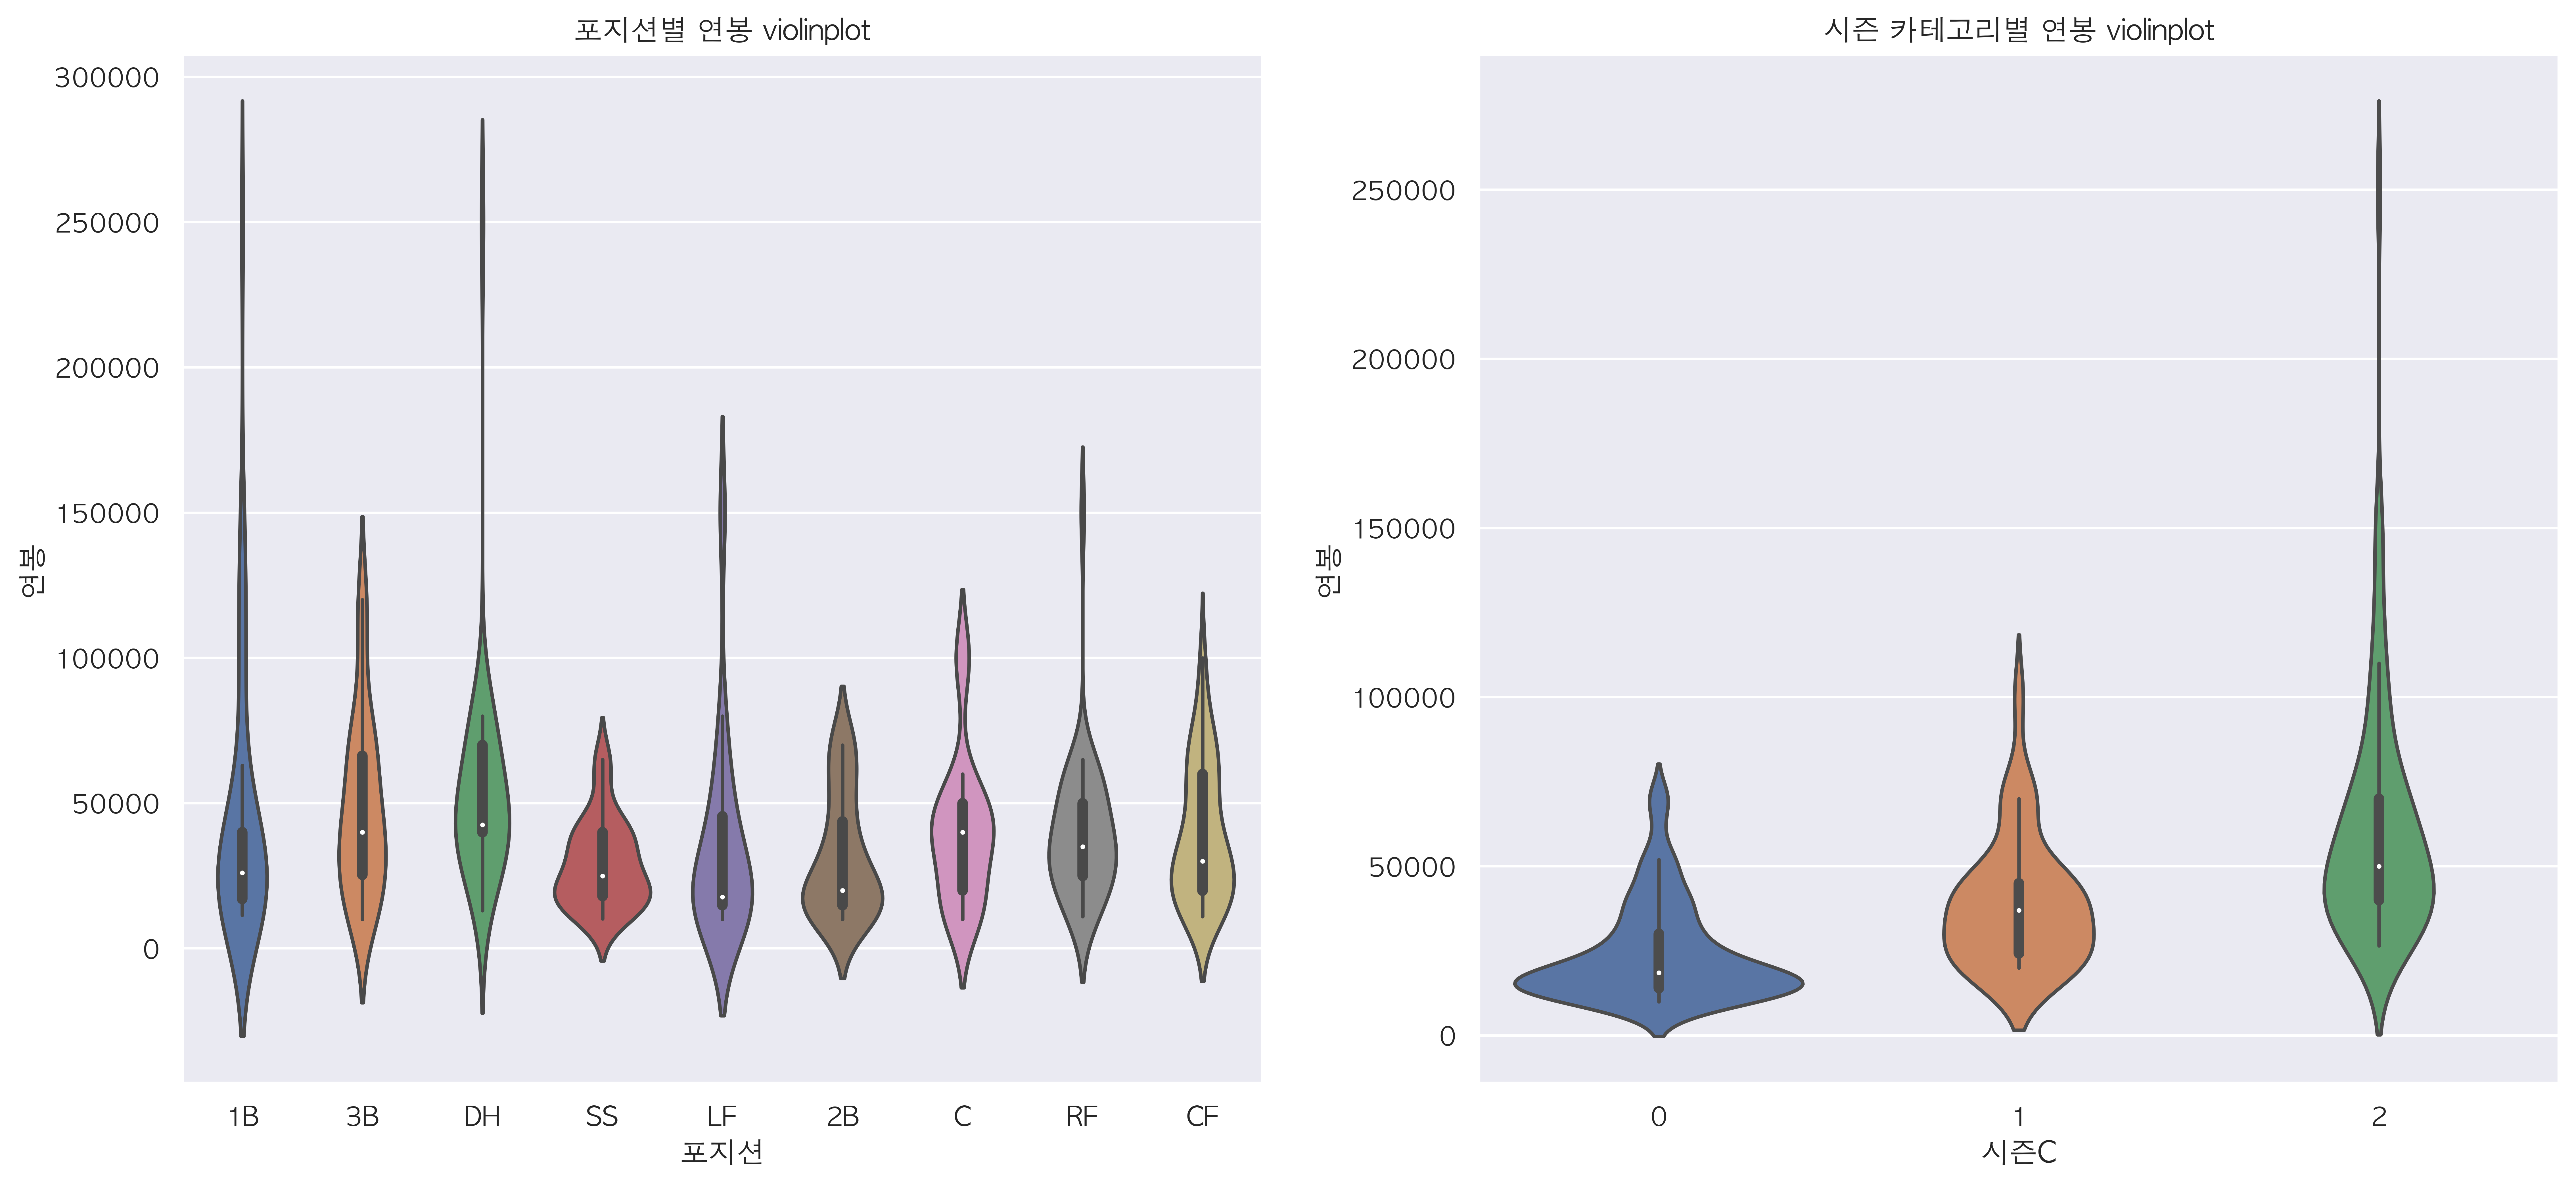

In [61]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='포지션', y='연봉', data=df1, ax=ax[0])
ax[0].set_title("포지션별 연봉 violinplot")

sns.violinplot(x='시즌C', y='연봉', data=df1, ax=ax[1])
ax[1].set_title("시즌 카테고리별 연봉 violinplot")

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='나이C', y='연봉', data=df, ax=ax[0])
ax[0].set_title("나이 카테고리 연봉 violinplot")

sns.violinplot(x='외국인', y='연봉', data=df, ax=ax[1])
ax[1].set_title("외국인 여부별 연봉 violinplot")

### 정리
- 1B과 DH에 아웃라이어가 큼
- 시즌 2015년 이후에 아웃라이어가 큼
- 26~37세 사이에 아웃라이어가 큼
- 외국인 중에는 아웃라이어가 없음

In [53]:
# 아웃라이어를 정리하기 위해 아웃라이어의 인덱스를 파악하는 코드


def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[column]
    quantile_20 = np.percentile(fraud.values, 20)
    quantile_80 = np.percentile(fraud.values, 80)

    iqr = quantile_80 - quantile_20
    iqr_weight = iqr * weight
    lowest_val = quantile_20 - iqr_weight
    highest_val = quantile_80 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [54]:
# 연봉 아웃라이어 인덱스 파악
get_outlier(df=df, column='연봉', weight=1.5)

Int64Index([214, 224, 564, 1235, 1240], dtype='int64')

In [46]:
# 19, 24 : 이대호
Lee_outlier_index = [19, 24]

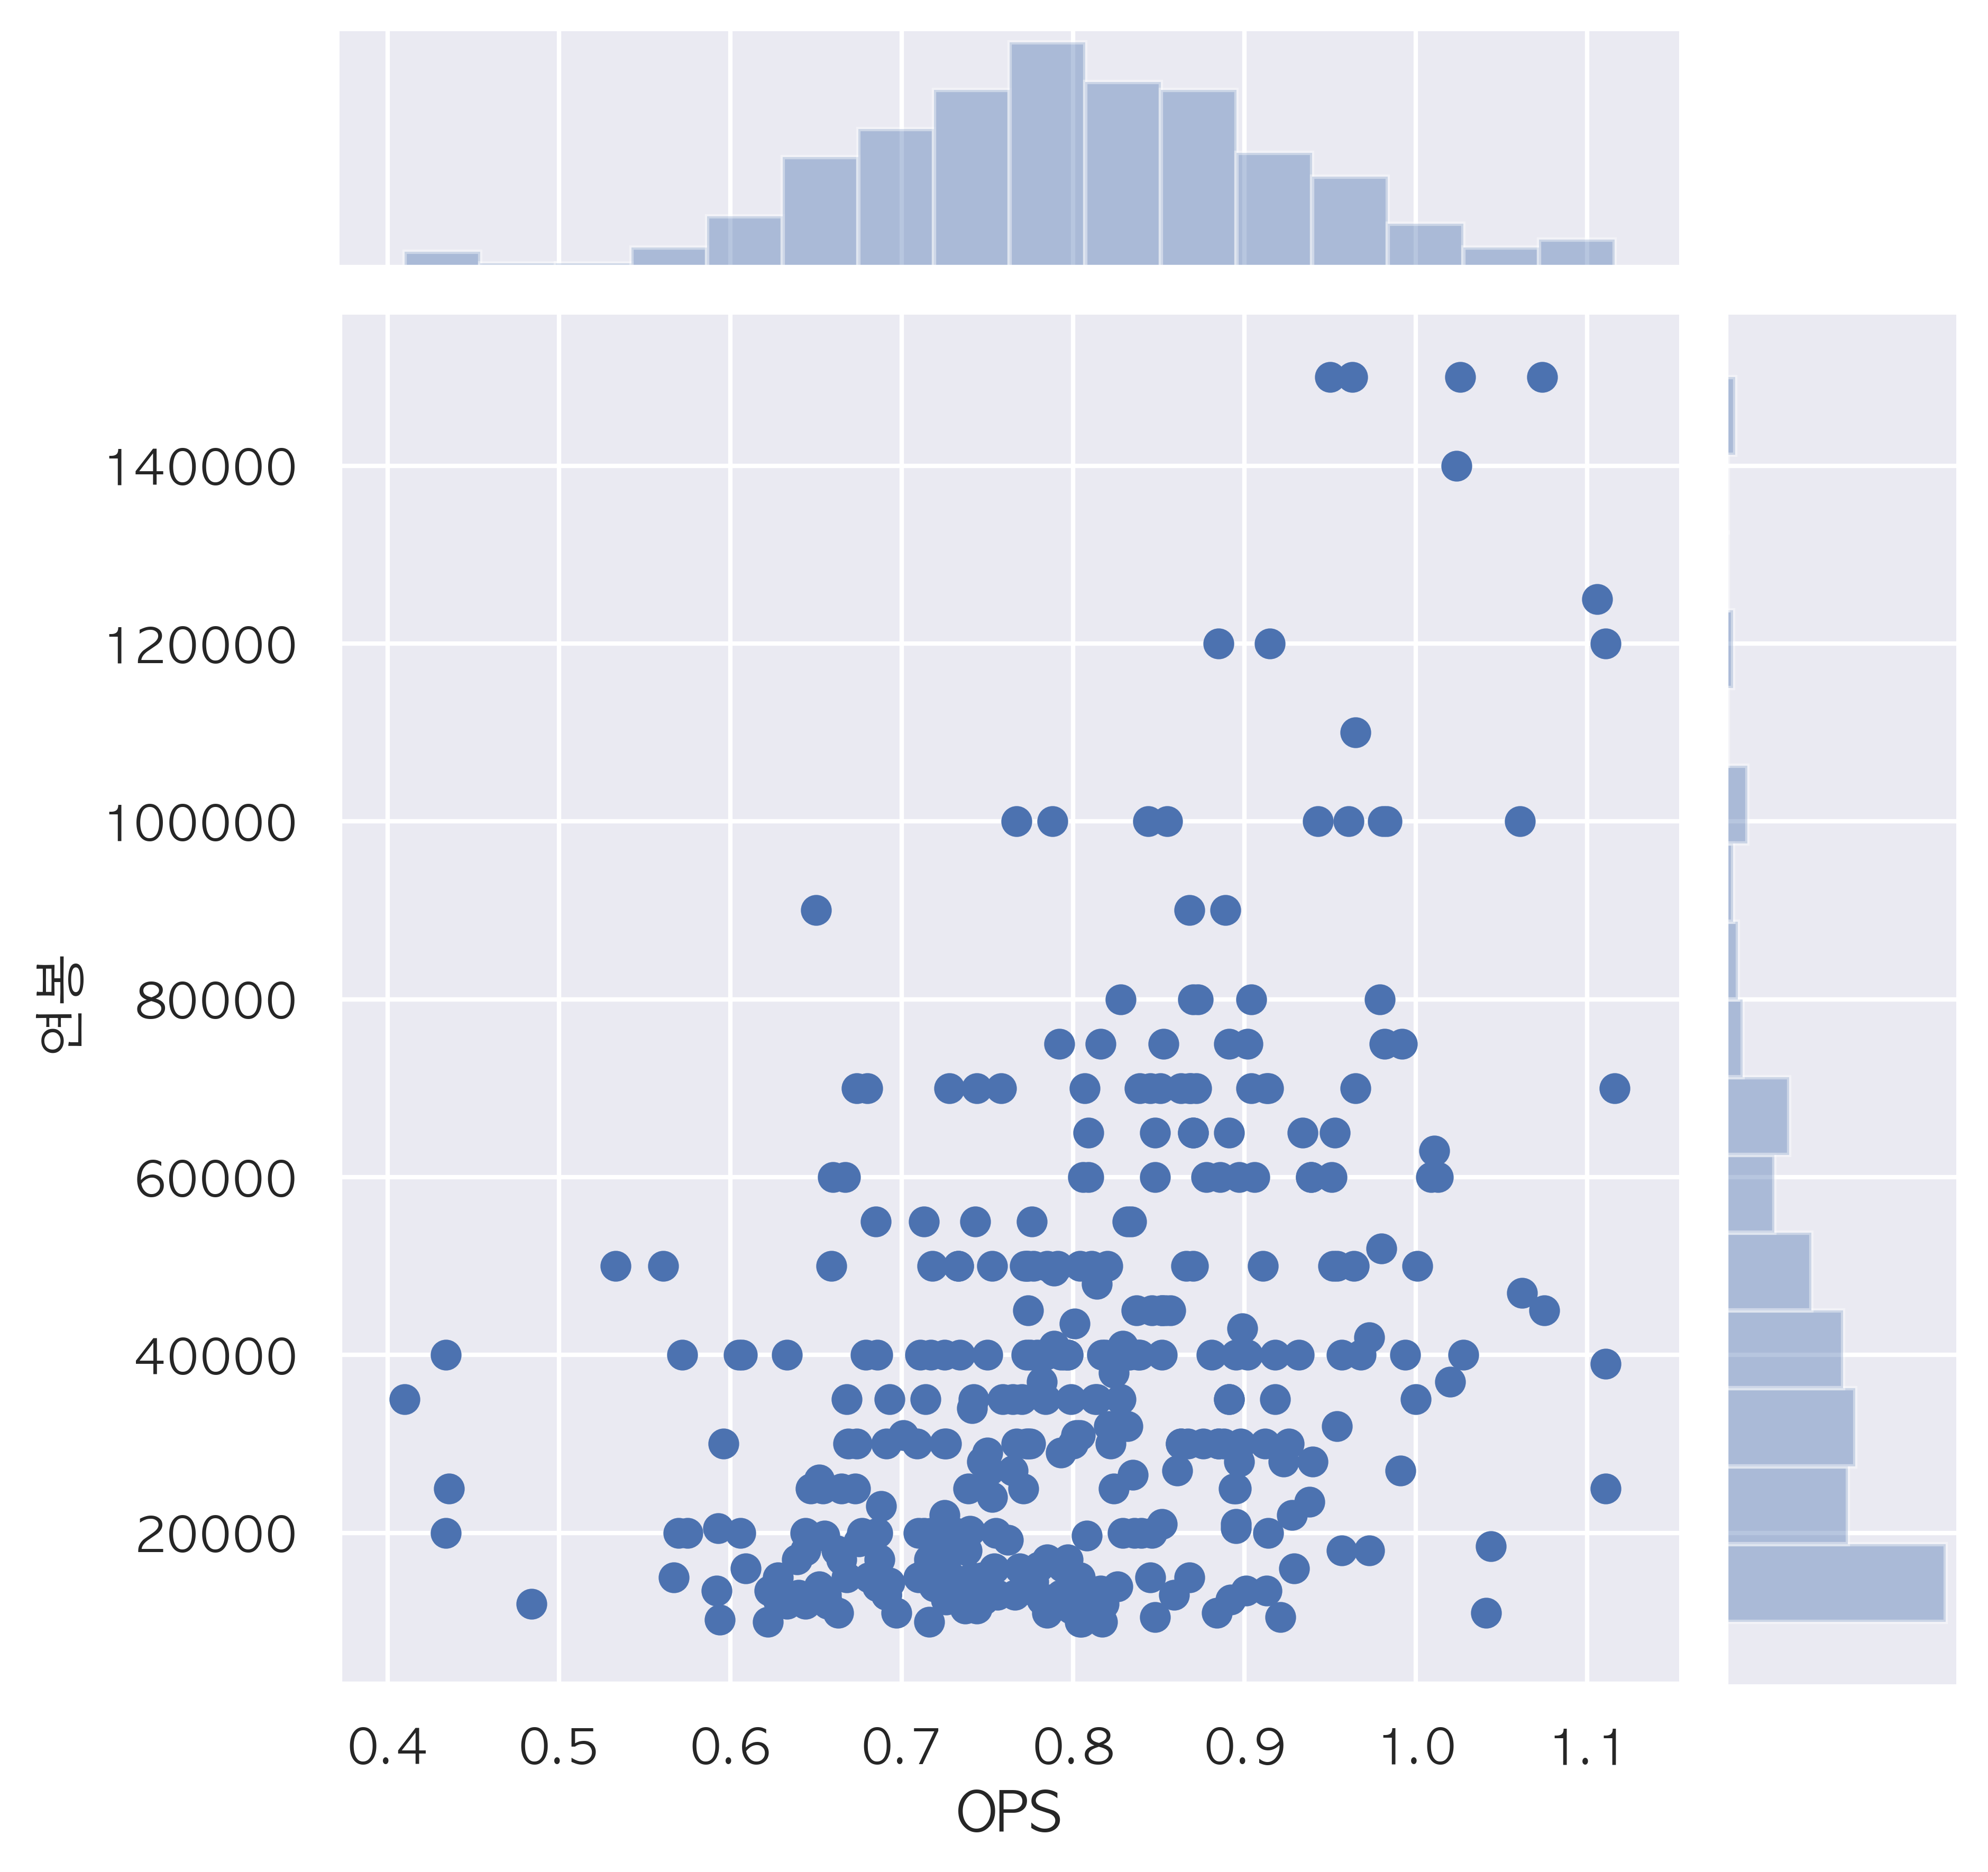

In [67]:
sns.jointplot(x='OPS', y='연봉', data=df)
plt.show()

In [62]:
df.shape

(356, 52)

In [63]:
outlier_index = get_outlier(df=df, column='OPS', weight=1.5)
df.drop(outlier_index, axis=0, inplace=True)
df.shape

(356, 52)

In [64]:
model = sm.OLS.from_formula(
    '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     33.61
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.54e-78
Time:                        12:31:43   Log-Likelihood:                -258.46
No. Observations:                 356   AIC:                             572.9
Df Residuals:                     328   BIC:                             681.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0778    

Text(0.5, 1.0, '시즌 카테고리별 연봉 violinplot')

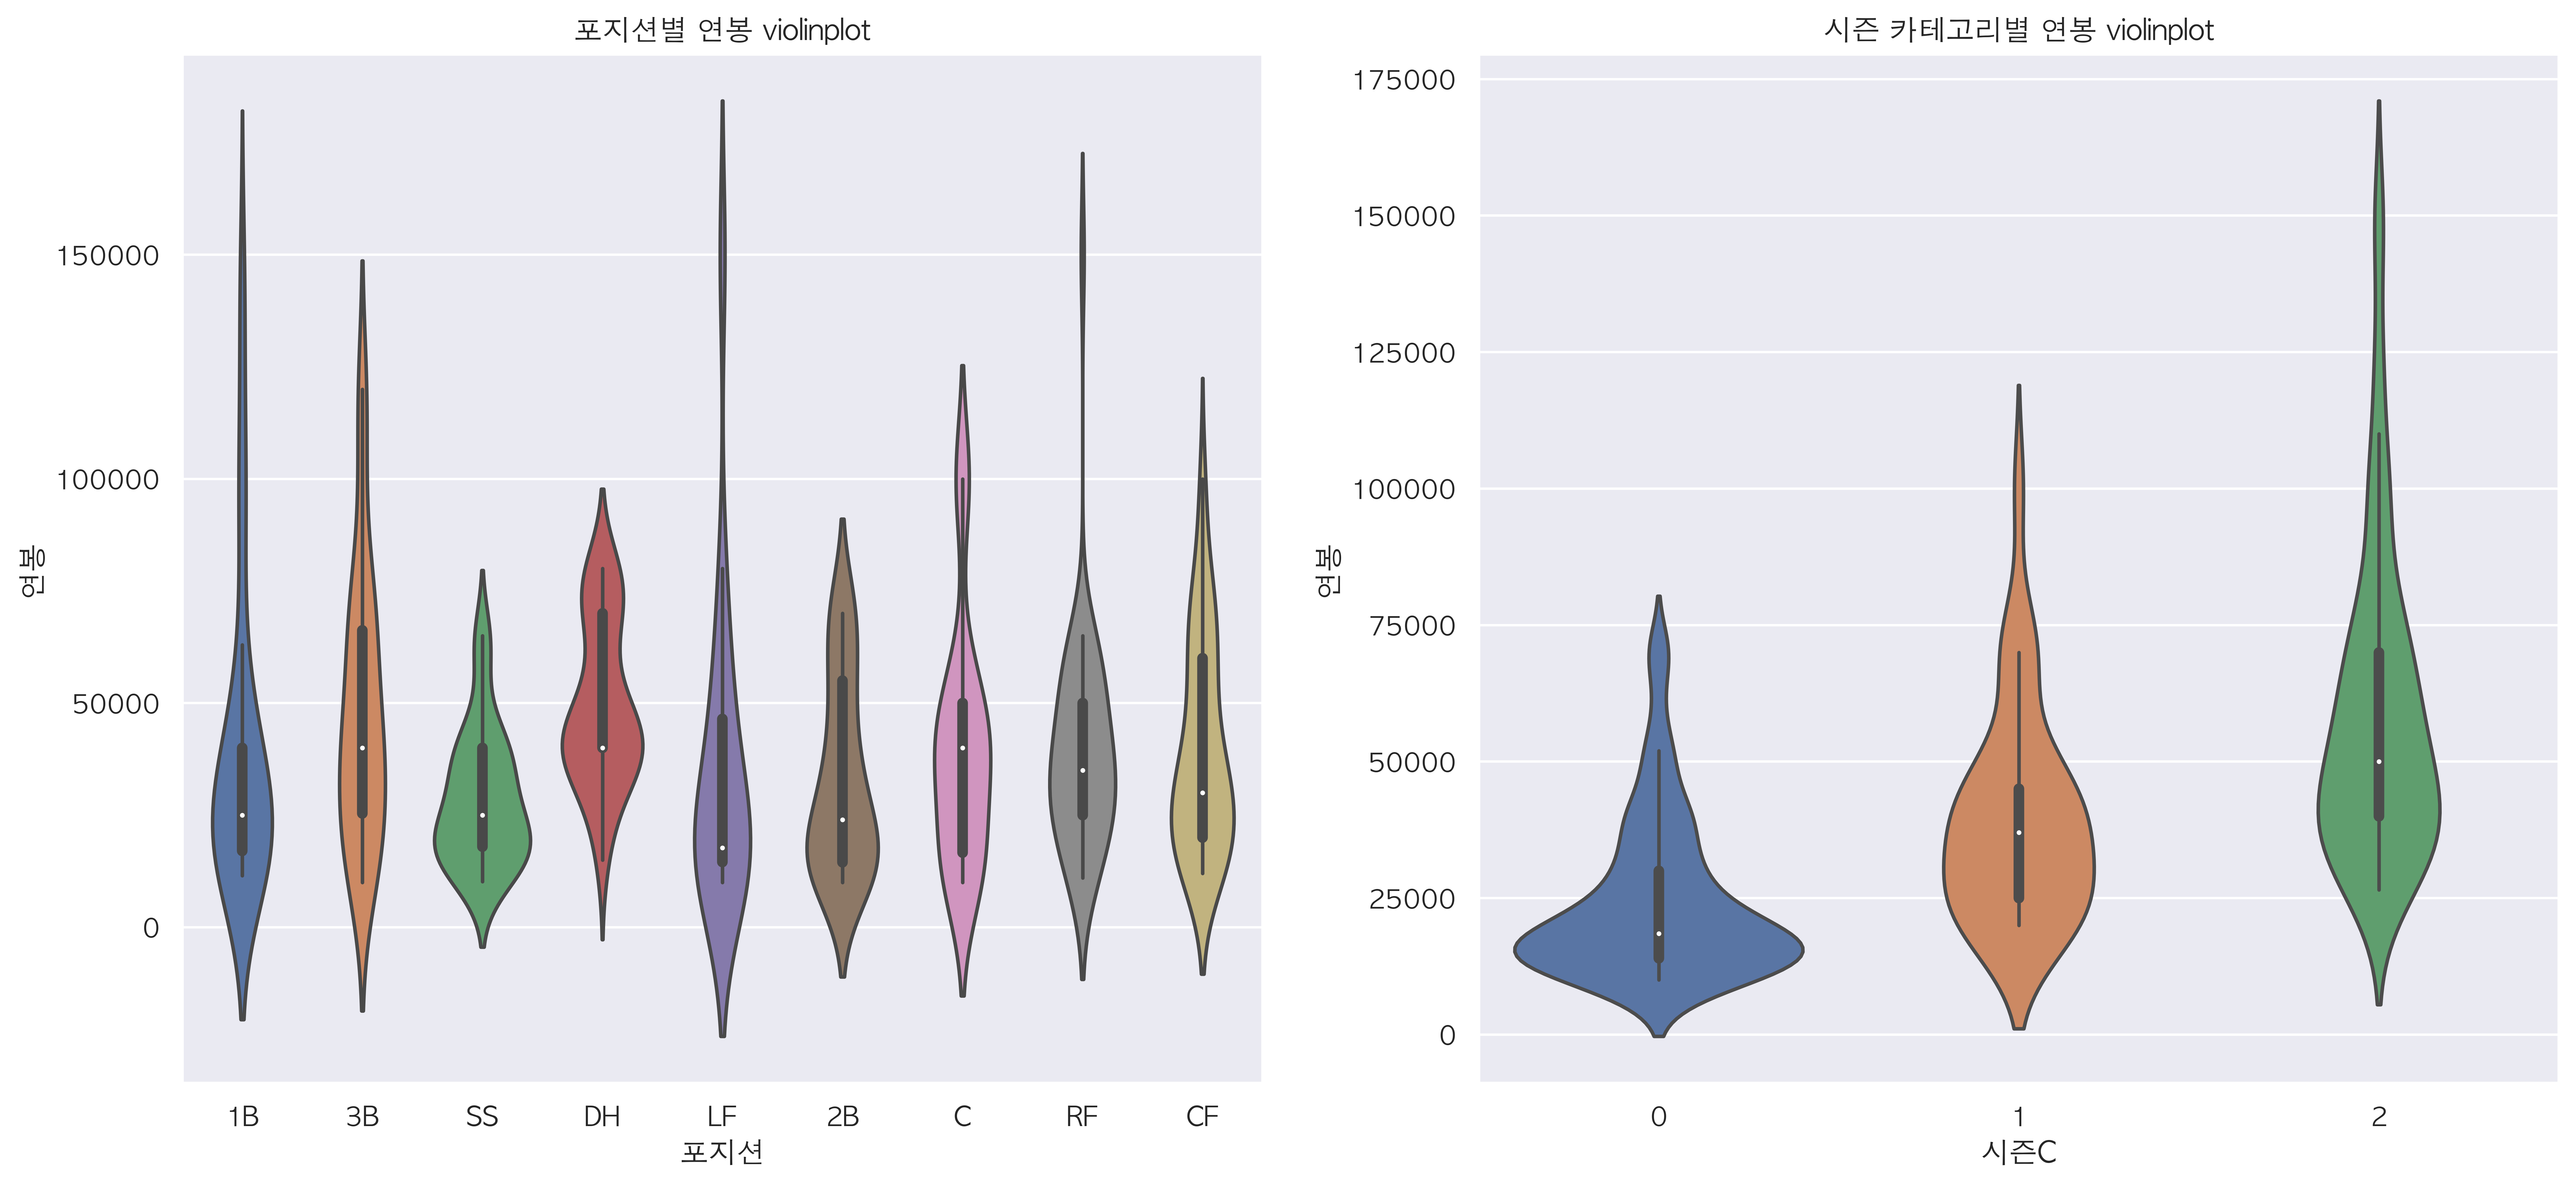

In [66]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='포지션', y='연봉', data=df, ax=ax[0])
ax[0].set_title("포지션별 연봉 violinplot")

sns.violinplot(x='시즌C', y='연봉', data=df, ax=ax[1])
ax[1].set_title("시즌 카테고리별 연봉 violinplot")

### PCA

In [36]:
df.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '학력', '계약',
       '시즌C', '경험N', '외국인', 'BABIP', '이적', '이적C', '나이C', 'K', '로그연봉'],
      dtype='object')

```python
# 아웃라이어 제거
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(df['OPS']) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx2 = list(set(range(len(df))).difference(idx))
df1 = df.iloc[idx2, :].reset_index(drop=True)
```